# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;"> Introduction </span>

<span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">Business Question:</span>

**How can machine learning models optimize real estate pricing and sales strategies by analyzing housing attributes and market trends?**

### Research Question:
**How can machine learning models help real estate stakeholders understand, predict, and enhance property pricing and investment strategies?**

### Sub-questions:

1. What insights can unsupervised learning provide about regional property demand, pricing, and investment opportunities?

2. How can visualizations and descriptive statistics reveal the most impactful variables in the property market?

3. Which housing attributes (e.g., location, age, amenities) are the most influential in predicting house prices?


This project aims to privide valueble insights for real estate stakeholders into how machine learning models can optimize pricing, improve sales forecasting, and identify profitable investment opportunities.


<span style="color: #8DB3B1; font-size: 36px; font-family: 'Times New Roman'; font-weight: bold;">Research focus of this notebook:</span>

In this notebook We will focus on sub-question number  3.


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">introduction </span>

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">1. Importing basic libraries </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">2. Reading Files </span>

In [2]:
import pandas as pd

# Define file paths
file_paths = [
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\testing_data_transformed.parquet",
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\training_data_transformed.parquet",
    r"C:\Users\josel\OneDrive\Documents\GitHub\House-pricing-analysis\validating_data_transformed.parquet"
]

# Read each parquet file separately
testing_df = pd.read_parquet(file_paths[0])
training_df = pd.read_parquet(file_paths[1])
validating_df = pd.read_parquet(file_paths[2])




# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">3. Preparing dataset </span>

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.1 Defining features and target
</span>


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Note:**</span>

- Before training a model, the target variable (y), which is the price (koopPrijs), must be separated from the features set (X). 


In [4]:
# Define the target column name
target_column = 'koopPrijs'  # The target variable representing property price

# Split the training data
X_train = training_df.drop(columns=[target_column], errors='ignore')
y_train = training_df[target_column] if target_column in training_df.columns else None

# Split the validation data
X_val =validating_df.drop(columns=[target_column], errors='ignore')
y_val = validating_df[target_column] if target_column in validating_df.columns else None

# Split the testing data
X_test = testing_df.drop(columns=[target_column], errors='ignore')
y_test = testing_df[target_column] if target_column in testing_df.columns else None

# Verify if target column exists in all datasets
print(f"Training target defined: {y_train is not None}")
print(f"Validation target defined: {y_val is not None}")
print(f"Testing target defined: {y_test is not None}")


Training target defined: True
Validation target defined: True
Testing target defined: True


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.2 Scaling the dataset 
</span>


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train is your feature dataframe
X_train.describe().transpose()[["min", "max"]]


,min,max
bouwjaar,-1.011735e+01,7.146064e+01
indTuin,0.000000e+00,1.000000e+00
perceelOppervlakte,-1.047605e+01,2.992122e+00
aantalKamers,1.000000e+00,3.600000e+01
aantalBadkamers,-6.591949e-17,1.151856e-15
...,...,...
title_emb_380,-6.391936e-01,7.500637e-01
title_emb_381,-8.815891e-01,6.855205e-01
title_emb_382,-9.875217e-01,6.297647e-01
title_emb_383,-4.481137e-01,6.685885e-01


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.3 Verifying the dataset proportions
</span>


In [7]:
import pandas as pd

# Create a dictionary to store dataset shapes
data_shapes = {
    "X_train": X_train.shape,
    "y_train": y_train.shape,
    "X_val": X_val.shape,
    "y_val": y_val.shape,
    "X_test": X_test.shape,
    "y_test": y_test.shape
}

# Convert to a DataFrame for better visualization
df_shapes = pd.DataFrame(data_shapes, index=["Rows", "Columns"]).transpose()

# Display the DataFrame
print(df_shapes)


           Rows  Columns
X_train  119797      417
y_train  119797   119797
X_val     39933      417
y_val     39933    39933
X_test    39933      417
y_test    39933    39933


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.4 fixing columns names first
</span>
 


In [8]:
import pandas as pd

# Assume original feature names are available from an earlier step
feature_names = [f'feature_{i}' for i in range(X_train_scaled.shape[1])]  # Placeholder if names are unknown

# Convert NumPy arrays to DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

# Clean column names
X_train_scaled.columns = X_train_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_val_scaled.columns = X_val_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)
X_test_scaled.columns = X_test_scaled.columns.astype(str).str.replace(r'[\[\]<>]', '', regex=True)


In the first trial, there were some issues with the titles, therefore, these will be corrected before tuning. The error "feature_names must be string, and may not contain [, ] or <" occurs because some column names in your X_train dataset contain invalid characters like brackets ([ ]) or the less-than symbol (<). XGBoost does not accept such column names. 

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 3.4 combining the dataset
</span>
 


In [9]:
# Combine training and validation datasets
X_train_val = np.vstack([X_train_scaled, X_val_scaled])
y_train_val = np.hstack([y_train, y_val])

# Print the shapes to verify
print(f"X_train_val shape: {X_train_val.shape}")
print(f"y_train_val shape: {y_train_val.shape}")

X_train_val shape: (159730, 417)
y_train_val shape: (159730,)


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">4. Baseline Models:  Linear & Ridge Regression </span>

The baseline model is used as a point of reference to evaluate the performance of more complex models, like ANN and random forest regressor. It helps in comparing whether the other models are adding value or if a basic approach performs just as well.  

**Note**: the conclusion of the performed model can be read in section 4.6.

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.1 Importing Libraries
</span>


In [11]:
# Importing the basic libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.2 Singular Value Decomposition
</span>


As **Linear Regression** is affected by high-dimensional data, this will be reduced throuhg SVD which is a technique to reduce dimensions while preserving important data within teh chosen components. By transforming correlated features into uncorrelated components, SVD stabilizes coefficient estimates. SVD can help also tackle existing multicollinearity, and prevent overfitting, as it reduce it to the most important features so that the model can learn patterns intead of noise,in order to make better generalization on the unseen data. 


### 4.2.1 Analyzing which number of components is the best

A test will be performed first to check how many components is need to preserve a variance of 90%.

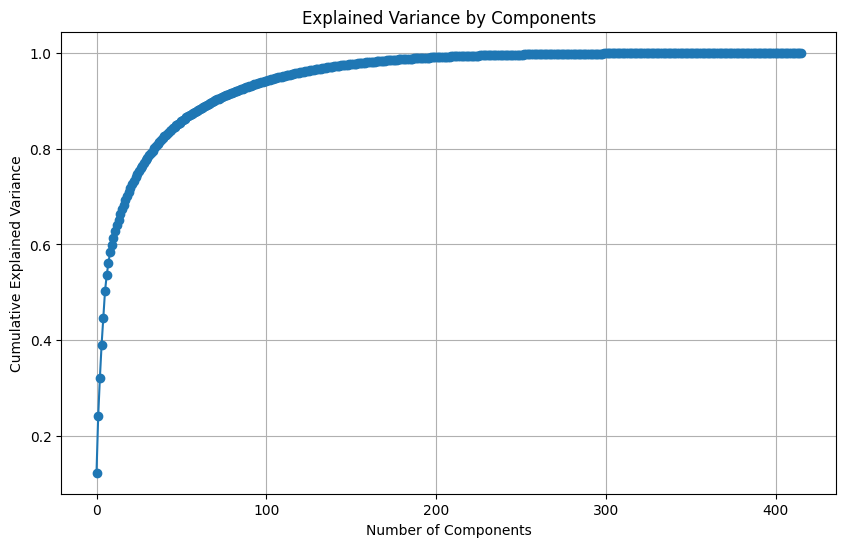

Number of components capturing 98% variance: 161


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

# Fit SVD on the scaled training data only
svd = TruncatedSVD(n_components=min(X_train.shape[1], X_train.shape[0]) - 1, n_iter=20, random_state=42)
svd.fit(X_train)  # Fit on training data only

# Transform the datasets
X_train_transformed = svd.transform(X_train)
X_val_transformed = svd.transform(X_val)
X_test_transformed = svd.transform(X_test)

# Calculate cumulative variance explained by the components (on training data)
cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

# Plot the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

# Determine the number of components for desired explained variance, e.g., 98%
n_components = np.where(cumulative_variance >= 0.98)[0][0] + 1
print(f"Number of components capturing 98% variance: {n_components}")



### 4.2.2 Performing SVD on the scaled dataset

In [13]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Ensure input data is in NumPy array format
X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_val_np = X_val.to_numpy() if isinstance(X_val, pd.DataFrame) else X_val
X_test_np = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# Combine train & validation for SVD fitting (no test set to avoid data leakage)
X_svd_fit = np.vstack([X_train_np, X_val_np])

# Fit SVD to capture 98% variance
svd_full = TruncatedSVD(n_components=min(X_svd_fit.shape) - 1, n_iter=20, random_state=42)
svd_full.fit(X_svd_fit)

# Compute cumulative explained variance
cumulative_variance = np.cumsum(svd_full.explained_variance_ratio_)

# Find the number of components capturing at least 98% variance
n_components_98 = np.argmax(cumulative_variance >= 0.98) + 1  # First index where condition is met
print(f"✅ Number of components capturing 98% variance: {n_components_98}")

# Apply SVD with the optimal number of components
svd = TruncatedSVD(n_components=n_components_98, n_iter=20, random_state=42)
svd.fit(X_svd_fit)  # Fit only on train+val

# Transform datasets using trained SVD
X_train_svd = svd.transform(X_train_np)
X_val_svd = svd.transform(X_val_np)
X_test_svd = svd.transform(X_test_np)

# Convert transformed data into DataFrames with meaningful column names
svd_features = [f"svd_component_{i}" for i in range(n_components_98)]
X_train_svd_df = pd.DataFrame(X_train_svd, columns=svd_features)
X_val_svd_df = pd.DataFrame(X_val_svd, columns=svd_features)
X_test_svd_df = pd.DataFrame(X_test_svd, columns=svd_features)

# Verify shape consistency
print(f"Train shape: {X_train_svd_df.shape}, Validation shape: {X_val_svd_df.shape}, Test shape: {X_test_svd_df.shape}")

# Ensure all datasets have the same number of features
assert X_train_svd_df.shape[1] == X_val_svd_df.shape[1] == X_test_svd_df.shape[1], "❌ Feature mismatch detected!"

print("✅ SVD applied successfully with reduced dimensions.")

# -----------------------------------------------------------------------------
# 🔹 **Apply MinMax Scaling After SVD**
# -----------------------------------------------------------------------------

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data only
scaler.fit(X_train_svd_df)

# Scale training, validation, and test data
X_train_svd_scaled = scaler.transform(X_train_svd_df)
X_val_svd_scaled = scaler.transform(X_val_svd_df)
X_test_svd_scaled = scaler.transform(X_test_svd_df)

# Convert scaled data back into DataFrames
X_train_final_svd = pd.DataFrame(X_train_svd_scaled, columns=svd_features)
X_val_final_svd = pd.DataFrame(X_val_svd_scaled, columns=svd_features)
X_test_final_svd = pd.DataFrame(X_test_svd_scaled, columns=svd_features)

print("✅ SVD features successfully scaled with MinMaxScaler.")




✅ Number of components capturing 98% variance: 161
Train shape: (119797, 161), Validation shape: (39933, 161), Test shape: (39933, 161)
✅ SVD applied successfully with reduced dimensions.
✅ SVD features successfully scaled with MinMaxScaler.


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.3 Fitting the model on the transformed dataset, without svd
</span>


To ensure a fair comparison of the Ridge and Linear Regression model the train-test split will be the same for both models. 

### 4.3.1 Splitting the data for ridge and linear regression

→ Merging the data first:

In [14]:
X_train_final = np.vstack((X_train_scaled, X_val_scaled, X_test_scaled))
y_train_final = np.hstack((y_train, y_val, y_test))

→ Splitting the dataset for linear regression: 

In [15]:
from sklearn.model_selection import train_test_split

# Split entire dataset once (Same for both Ridge & Linear Regression)
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X_train_final, y_train_final, test_size=0.1, random_state=46)



→ further splitting the dataset for ridge tuning:

In [16]:
# Further split Ridge's training data into train & validation (Same random_state)
X_train_ridge, X_val_ridge, y_train_ridge, y_val_ridge = train_test_split(X_train_final, y_train_final, test_size=0.1, random_state=46)


### 4.3.2 Fitting the model for Linear Regression

As linear regression doe snot require tuning the model will be tested on the train and test data only. Therefore, the train and validation set will be merged. 

In [17]:
# Train Linear Regression (No validation needed)
model_linear = LinearRegression()
model_linear.fit(X_trainlr, y_trainlr)

LinearRegression()

### 4.3.2 Tuning and fitting the Ridge model

Ridge regression model does require to be tuned, as the best alpha must be found to help enhace the accuracy, while improving the model's performance by ensuring/ balancing it doesn't overfits or underfits.

→ Tuning tuning teh ridge model using gridsearch:

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split


# Step 2: Define Ridge tuning parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Step 3: Tune Ridge using Train Data (Validation is used internally in CV)
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')  # CV = 5 uses 80% train, 20% val in folds
grid_search.fit(X_train_ridge, y_train_ridge)  # Uses cross-validation internally

# Step 4: Get Best Alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha for Ridge: {best_alpha}")


Best Alpha for Ridge: 0.1


Best Alpha for Ridge: 1, this will be manually put in the next code for training the ridge model.

→ Training Ridge on merged Train + Validation set using best alpha

In [19]:
#train ridge regression on the merged x_trainlr dataset
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_trainlr, y_trainlr)


Ridge(alpha=1)

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.4 Model Evaluation on the dataset without SVD
</span>


In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Predict and compare both models
y_pred_linear = model_linear.predict(X_testlr)
y_pred_ridge = ridge_model.predict(X_testlr)

# Function to calculate multiple metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error (MAPE)
    evs = explained_variance_score(y_true, y_pred)  # Explained Variance Score
    
    print(f"\n**{model_name} Performance Metrics:**")
    print(f"🔹 R² Score: {r2:.4f}")
    print(f"🔹 Explained Variance Score (EVS): {evs:.4f}")
    print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
    print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
    print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print("-" * 50)

# Evaluate models
evaluate_model(y_testlr, y_pred_linear, "Linear Regression")
evaluate_model(y_testlr, y_pred_ridge, "Ridge Regression")



**Linear Regression Performance Metrics:**
🔹 R² Score: 0.6358
🔹 Explained Variance Score (EVS): 0.6358
🔹 Mean Absolute Error (MAE): 0.46
🔹 Mean Squared Error (MSE): 0.36
🔹 Root Mean Squared Error (RMSE): 0.60
🔹 Mean Absolute Percentage Error (MAPE): 889.41%
--------------------------------------------------

**Ridge Regression Performance Metrics:**
🔹 R² Score: 0.6354
🔹 Explained Variance Score (EVS): 0.6354
🔹 Mean Absolute Error (MAE): 0.46
🔹 Mean Squared Error (MSE): 0.36
🔹 Root Mean Squared Error (RMSE): 0.60
🔹 Mean Absolute Percentage Error (MAPE): 898.46%
--------------------------------------------------


c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression Performance Metrics:
🔹 R² Score: -0.3909
🔹 Explained Variance Score (EVS): -0.3909
🔹 Mean Absolute Error (MAE): 0.95
🔹 Mean Squared Error (MSE): 1.39
🔹 Root Mean Squared Error (RMSE): 1.18
🔹 Mean Absolute Percentage Error (MAPE): 280.22%


Ridge Regression Performance Metrics:
🔹 R² Score: -0.3909
🔹 Explained Variance Score (EVS): -0.3909
🔹 Mean Absolute Error (MAE): 0.95
🔹 Mean Squared Error (MSE): 1.39
🔹 Root Mean Squared Error (RMSE): 1.18
🔹 Mean Absolute Percentage Error (MAPE): 280.22%


In [21]:
# After evaluating the models, you can assign the desired metrics to variables like this:

# Linear Regression metrics
test_mse_lr = mean_squared_error(y_testlr, y_pred_linear)
test_mae_lr = mean_absolute_error(y_testlr, y_pred_linear)
test_r2_lr = r2_score(y_testlr, y_pred_linear)

# Ridge Regression metrics
test_mse_ridge = mean_squared_error(y_testlr, y_pred_ridge)
test_mae_ridge = mean_absolute_error(y_testlr, y_pred_ridge)
test_r2_ridge = r2_score(y_testlr, y_pred_ridge)

# Print or use them as needed
print("Linear Regression → MSE:", test_mse_lr, "MAE:", test_mae_lr, "R²:", test_r2_lr)
print("Ridge Regression → MSE:", test_mse_ridge, "MAE:", test_mae_ridge, "R²:", test_r2_ridge)



Linear Regression → MSE: 0.36168143523933466 MAE: 0.46207130522830825 R²: 0.6358235297188076
Ridge Regression → MSE: 0.36205451713395986 MAE: 0.46260443651233457 R²: 0.6354478741438387


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.5 Model fitting & evaluation on the dataset with SVD
</span>


### 4.5.1 Splitting the data for ridge and linear regression

In [22]:

#→ Merging the data first:
X_train_final_ncomp = np.vstack((X_train_final_svd, X_val_final_svd, X_test_final_svd))
y_train_final_ncomp = np.hstack((y_train, y_val, y_test))

→ Splitting the dataset for linear regression: 

In [23]:
from sklearn.model_selection import train_test_split

# Split entire dataset once (Same for both Ridge & Linear Regression)
X_train_ncomp, X_test_ncomp, y_train_ncomp, y_test_ncomp = train_test_split(X_train_final_ncomp, y_train_final_ncomp, test_size=0.1, random_state=46)


### 4.5.2 Fitting both Ridge and Linear regression models

In [24]:

# Train Linear Regression (No validation needed)
model_linear = LinearRegression()
model_linear.fit(X_train_final_ncomp, y_train_final_ncomp)

LinearRegression()

In [25]:
#train ridge regression on the merged x_trainlr dataset
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_final_ncomp, y_train_final_ncomp)

Ridge(alpha=1)

### 4.5.3 Evaluating both Ridge and Linear regression models 

In [26]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

# Predict and compare both models
y_pred_linear = model_linear.predict(X_test_ncomp)
y_pred_ridge = ridge_model.predict(X_test_ncomp)

# Function to calculate multiple metrics
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)  # RMSE
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # Mean Absolute Percentage Error (MAPE)
    evs = explained_variance_score(y_true, y_pred)  # Explained Variance Score
    
    print(f"\n**{model_name} Performance Metrics (svd):**")
    print(f"🔹 R² Score: {r2:.4f}")
    print(f"🔹 Explained Variance Score (EVS): {evs:.4f}")
    print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
    print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
    print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"🔹 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print("-" * 50)

# Evaluate models
evaluate_model(y_test_ncomp, y_pred_linear, "Linear Regression")
evaluate_model(y_test_ncomp, y_pred_ridge, "Ridge Regression")



**Linear Regression Performance Metrics (svd):**
🔹 R² Score: 0.6209
🔹 Explained Variance Score (EVS): 0.6209
🔹 Mean Absolute Error (MAE): 0.47
🔹 Mean Squared Error (MSE): 0.38
🔹 Root Mean Squared Error (RMSE): 0.61
🔹 Mean Absolute Percentage Error (MAPE): 909.03%
--------------------------------------------------

**Ridge Regression Performance Metrics (svd):**
🔹 R² Score: 0.6208
🔹 Explained Variance Score (EVS): 0.6208
🔹 Mean Absolute Error (MAE): 0.47
🔹 Mean Squared Error (MSE): 0.38
🔹 Root Mean Squared Error (RMSE): 0.61
🔹 Mean Absolute Percentage Error (MAPE): 906.55%
--------------------------------------------------


c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 4.6 Conclusion on the models performed with and without svd
</span>


### 4.6.1 Plotting the model tested on the scaled dataset

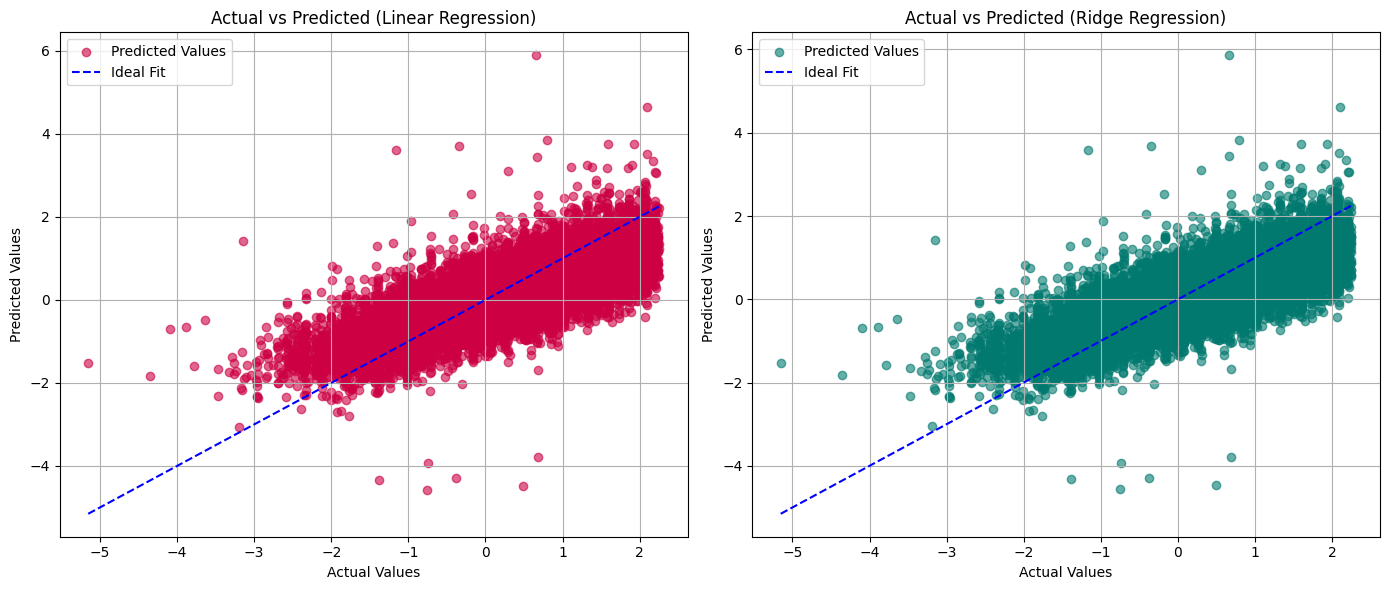

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_testlr and y_pred values exist and are consistent
assert len(y_testlr) == len(y_pred_linear) == len(y_pred_ridge), "Mismatch in sample sizes!"

# Plot Actual vs Predicted for Linear Regression and Ridge Regression models
plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_testlr, y_pred_linear, color='#CC0042', alpha=0.6, label='Predicted Values')
plt.plot([min(y_testlr), max(y_testlr)], [min(y_testlr), max(y_testlr)], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Plot for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_testlr, y_pred_ridge, color='#01796F', alpha=0.6, label='Predicted Values')
plt.plot([min(y_testlr), max(y_testlr)], [min(y_testlr), max(y_testlr)], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### 4.6.2 Plotting the model tested on the SVD transformed dataset

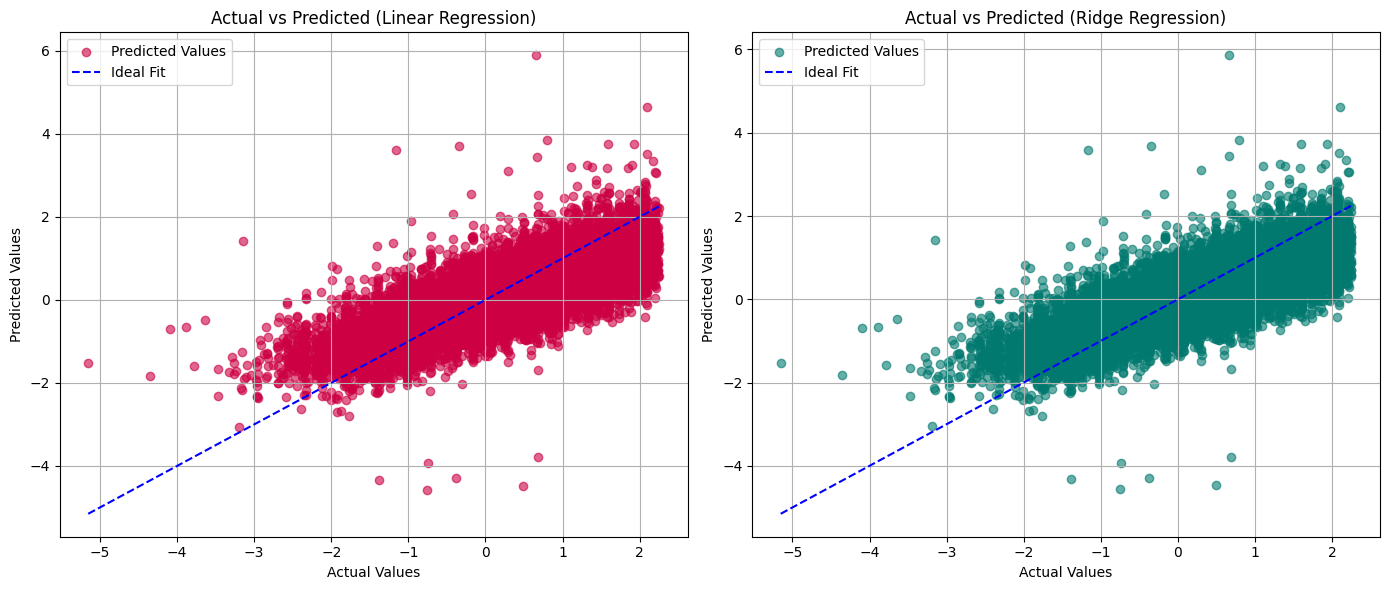

In [28]:
# Ensure y_test_ncomp and predicted values exist and are consistent
assert len(y_test_ncomp) == len(y_pred_linear) == len(y_pred_ridge), "Mismatch in sample sizes!"

# Plot Actual vs Predicted for Linear Regression and Ridge Regression models
plt.figure(figsize=(14, 6))

# Plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test_ncomp, y_pred_linear, color='#CC0042', alpha=0.6, label='Predicted Values')
plt.plot([min(y_test_ncomp), max(y_test_ncomp)], [min(y_test_ncomp), max(y_test_ncomp)], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Plot for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test_ncomp, y_pred_ridge, color='#01796F', alpha=0.6, label='Predicted Values')
plt.plot([min(y_test_ncomp), max(y_test_ncomp)], [min(y_test_ncomp), max(y_test_ncomp)], color='blue', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted (Ridge Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()


### 4.6.3 Analysis & Conclusion

<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">Comparison of Model Performance With and Without SVD</span>

| Metric                          | Linear Regression (SVD) | Ridge Regression (SVD) | Linear Regression (No SVD) | Ridge Regression (No SVD) |
|--------------------------------|-------------------------|-------------------------|---------------------------|---------------------------|
| **R² Score**                   | 0.6209                  | 0.6208                  | **0.6358**                 | **0.6354**                 |
| **Explained Variance Score (EVS)** | 0.6209                  | 0.6208                  | **0.6358**                 | **0.6354**                 |
| **Mean Absolute Error (MAE)**   | 0.47                    | 0.47                    | **0.46**                   | **0.46**                   |
| **Mean Squared Error (MSE)**    | 0.38                    | 0.38                    | **0.36**                   | **0.36**                   |
| **Root Mean Squared Error (RMSE)** | 0.61                  | 0.61                    | **0.60**                   | **0.60**                   |
| **Mean Absolute Percentage Error (MAPE)** | **909.03%**          | **906.55%**             | 889.41%                    | 898.46%                    |


To evaluate the performance, the R2 score will be compared. The difference between the model ran with svd and without is very small. However both models performed well, as an R2 above 0.5 is considered good.

| **R² Score**   | **Interpretation**        |
|---------------|------------------------|
| **0.70 – 1.00**  | Excellent   |
| **0.50 – 0.69**  | Good/Moderate  |
| **0.30 – 0.49**  | Weak   |
| **0.00 – 0.29**  | Poor   |
| **< 0.00**       | Useless   |


Furtehrmore, the MSE (Mean Squared Error), which measures the average squared difference between actual and predicted values, its low for both types of dataset meaning it has moderate error as a high MSE means larger prediction errors, which can indicate poor model fit.

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">5. Random Forest Regressor </span>

 Random Forest for Regression
Model: RandomForestRegressor (from sklearn.ensemble)
Purpose: Predicts continuous values (e.g., house prices, stock market trends).
Example Use Case: Estimating real estate prices based on features like square footage, location, etc.

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;">5.1  Importing libraries needed for Random Forest Regressor
</span>


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;">5.2 Tuning the model
</span>


### 5.2.1 Tuning function

<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">Description of the tuning method</span>

This code performs a grid search to optimize the hyperparameters of the `RandomForestRegressor` model using 5-fold cross-validatio. It systematically tests every combination of specified hyperparameters, running a total of **54 trials**, as it was previously test a trial of 20 yield a MSE score of approximately 0.4 therefore the trials were increased in order to increase the chances of finding better hyperparameters with a lower MSE score.

- **Hyperparameter Grid:**
This grid is a set of different values for each hyperparameter that the algorithm will test to find the best value.
  - **n_estimators:** [50, 100]  
  - **max_depth:** [5, 10, 15]  
  - **min_samples_split:** [5, 10, 20]  
  - **min_samples_leaf:** [3, 5, 10]  
  - **max_features:** [0.3]



In [ ]:
import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Define optimized parameter grid
param_grid = {
    "n_estimators": [50, 100],  # Reduced trees
    "max_depth": [5, 10, 15],  # Shallower trees to prevent memorization
    "min_samples_split": [5, 10, 20],  # Prevent small splits
    "min_samples_leaf": [3, 5, 10],  # Prevent overfitting on tiny leaves
    "max_features": [0.3]  # Use 30% of features per split (prevents overfitting)
}

# Initialize best parameters
best_params = None
best_error = float("inf")

# Track total iterations
total_iterations = (
    len(param_grid["n_estimators"]) *
    len(param_grid["max_depth"]) *
    len(param_grid["min_samples_split"]) *
    len(param_grid["min_samples_leaf"]) *
    len(param_grid["max_features"])
)
iteration = 1

# Grid search with cross-validation
for n_estimators in param_grid["n_estimators"]:
    for max_depth in param_grid["max_depth"]:
        for min_samples_split in param_grid["min_samples_split"]:
            for min_samples_leaf in param_grid["min_samples_leaf"]:
                for max_features in param_grid["max_features"]:
                    
                    start_time = time.time()

                    # Initialize RandomForestRegressor
                    rf = RandomForestRegressor(
                        n_estimators=n_estimators,
                        max_depth=max_depth,
                        min_samples_split=min_samples_split,
                        min_samples_leaf=min_samples_leaf,
                        max_features=max_features,
                        bootstrap=True,  # Bootstrapping helps prevent overfitting
                        random_state=42,
                        n_jobs=-1
                    )

                    # Apply 5-Fold Cross-Validation
                    mse_scores = cross_val_score(rf, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
                    mse_mean = -np.mean(mse_scores)  # Convert negative MSE to positive

                    # Check if it's the best model
                    if mse_mean < best_error:
                        best_error = mse_mean
                        best_params = {
                            "n_estimators": n_estimators,
                            "max_depth": max_depth,
                            "min_samples_split": min_samples_split,
                            "min_samples_leaf": min_samples_leaf,
                            "max_features": max_features
                        }

                    elapsed_time = time.time() - start_time
                    print(f"Iteration {iteration}/{total_iterations} → "
                          f"(n_estimators={n_estimators}, max_depth={max_depth}, "
                          f"min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, "
                          f"max_features={max_features}) | Mean CV MSE: {mse_mean:.4f} | Time: {elapsed_time:.2f}s")

                    iteration += 1

# Print final best parameters
print("\n✅ Best Parameters:", best_params)
print(f"✅ Lowest Mean Cross-Validation MSE: {best_error:.4f}")

# Train the best model on the full training set
rf_best = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
rf_best.fit(X_train_scaled, y_train)

# Predict on training and validation sets
y_train_pred = rf_best.predict(X_train_scaled)
y_val_pred = rf_best.predict(X_val_scaled)

# Compute MSE and R² Scores
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Print final results
print("\n📊 **Final Model Performance**")
print(f"🔹 Training Loss (MSE): {train_mse:.4f}")
print(f"🔹 Validation Loss (MSE): {val_mse:.4f}")
print(f"🔹 Training R² Score: {train_r2:.4f}")
print(f"🔹 Validation R² Score: {val_r2:.4f}")


Iteration 1/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 96.22s
Iteration 2/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=5, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 97.10s
Iteration 3/54 → (n_estimators=50, max_depth=5, min_samples_split=5, min_samples_leaf=10, max_features=0.3) | Mean CV MSE: 0.4752 | Time: 94.25s
Iteration 4/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 91.59s
Iteration 5/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features=0.3) | Mean CV MSE: 0.4749 | Time: 91.49s
Iteration 6/54 → (n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features=0.3) | Mean CV MSE: 0.4752 | Time: 91.68s
Iteration 7/54 → (n_estimators=50, max_depth=5, min_samples_split=20, min_samples_leaf=3, max_features=0.3) | Mean CV MSE: 0.4752 |

### 5.2.2 Saving the best params

the best parameters are saved due to time constraint, as running the gridsearch tuning took around 4 hours. Therefore, it will be saved and then used to fit the model to these best_params. 

In [ ]:
import joblib

# Best hyperparameters
best_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.3
}

# Save path
save_path = r"C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib"

# Save hyperparameters
joblib.dump(best_params, save_path)

print(f"Hyperparameters saved successfully at: {save_path}")


Hyperparameters saved successfully at: C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib


In [30]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Load saved hyperparameters
load_path = r"C:\Users\josel\OneDrive\Documents\GitHub\randomforest_best_parameters.joblib"
best_hyperparameters_saved = joblib.load(load_path)


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.3 Fitting the model on train data & visualizing the loss
</span>


The model will be first trained on the training dataset only. This allows the model to learn fundamental patterns from a smaller dataset without excessive complexity. After the model will be fitted on the combined dataset (train + validation) which can help reduce variance by providing more examples, and improve generalization without overfitting.

### 5.3.1 Training the model on the train dataset

In [31]:
# Train final model using the best parameters
rf_best = RandomForestRegressor(**best_hyperparameters_saved, random_state=42, n_jobs=-1)
rf_best.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=15, max_features=0.3, min_samples_leaf=3,
                      min_samples_split=5, n_jobs=-1, random_state=42)

### 5.3.2 Visualizing the MSE loss 

Training Loss (MSE): 0.14857624856294338
Validation Loss (MSE): 0.26896115374001556
Training R² Score: 0.8514237514370566
Validation R² Score: 0.7310388462599844


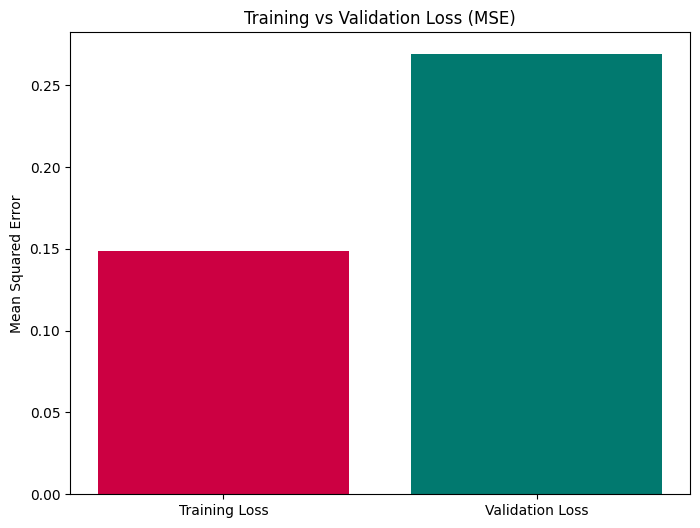

In [32]:
from sklearn.metrics import r2_score

# Calculate the predictions on the training and validation sets
y_train_pred_t = rf_best.predict(X_train_scaled)  # Predictions on the training set
y_val_pred_t = rf_best.predict(X_val_scaled)      # Predictions on the validation set

# Compute the mean squared error for training and validation sets
train_loss = mean_squared_error(y_train, y_train_pred_t)
val_loss = mean_squared_error(y_val, y_val_pred_t)

# Compute the R² scores for training and validation sets
train_r2 = r2_score(y_train, y_train_pred_t)
val_r2 = r2_score(y_val, y_val_pred_t)
# Print the MSE and R² scores
print("Training Loss (MSE):", train_loss)
print("Validation Loss (MSE):", val_loss)
print("Training R² Score:", train_r2)
print("Validation R² Score:", val_r2)
# Plot the losses
plt.figure(figsize=(8, 6))
plt.bar(["Training Loss", "Validation Loss"], [train_loss, val_loss], color=['#CC0042', '#01796F'])
plt.title("Training vs Validation Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;"> **Note:** </span>

The model performs well on training data, achieving a R² of 0.8583 and a MSE score od 0.1418 but generalizes slightly less accurate on the validation data (R² = 0.7352, MSE = 0.2616), which could indicate mild overfitting. However, its a further improvement as the first trial was an R2 of 0.3, which show that the tuning optimization worked. 

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.4 Fitting the model on merged data (validation + train) & visualisation
</span>


In this section the model will be fitted on the X_train_val and y_train_val, which is teh merged dataset of the train and validation data together. As the model was first trained on the training dataset to learn patterns. And now with the combined dataset the can learn from a larger  dataset, which can help the model in making better predictions or generalization while also reducing the risk of overfitting to the original training set. Also, by retraining the model, the model can benefit from additional insights present in the validation set, which can help the model to perform better.

### 5.4.1 Training the model on the train dataset

In [33]:
# Train final model using the best parameters
rf_best_final = RandomForestRegressor(**best_hyperparameters_saved, random_state=42, n_jobs=-1)
rf_best_final.fit(X_train_svd, y_train)


RandomForestRegressor(max_depth=15, max_features=0.3, min_samples_leaf=3,
                      min_samples_split=5, n_jobs=-1, random_state=42)

### 5.4.2 Visualizing the MSE loss 

c:\Users\josel\anaconda3\envs\AI_RESIT\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Combined Training + Validation Loss (MSE): 0.1561306635533798
Test Loss (MSE): 0.2610028086887241
Combined Training + Validation MAE: 0.30171498431817356
Test MAE: 0.38451955121632986
Combined Training + Validation R² Score: 0.8438693364466202
Test R² Score: 0.738997191311276


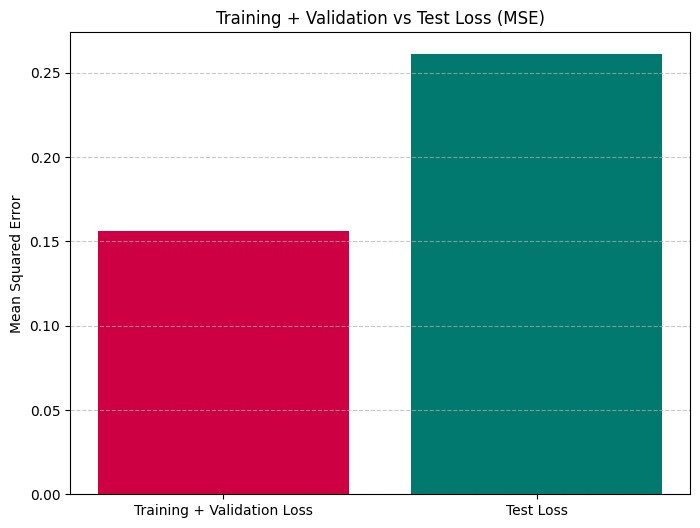

In [34]:
# source Ruta 

# Fit the final model on the combined dataset
rf_best_final.fit(X_train_val, y_train_val)

# Calculate the predictions on the combined training set and test set
y_train_val_pred = rf_best_final.predict(X_train_val)  # Predictions on the combined training set
y_test_pred_merged = rf_best_final.predict(X_test_scaled)   # Predictions on the test set

# Compute the mean squared error for the combined training and test sets
train_val_mse = mean_squared_error(y_train_val, y_train_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred_merged)

# Compute the MAE for the combined training and test sets
train_val_mae = mean_absolute_error(y_train_val, y_train_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred_merged)

# Compute the R² score for the combined training and test sets
train_val_r2 = r2_score(y_train_val, y_train_val_pred)
test_r2 = r2_score(y_test, y_test_pred_merged)

# Print the metrics
print("Combined Training + Validation Loss (MSE):", train_val_mse)
print("Test Loss (MSE):", test_mse)
print("Combined Training + Validation MAE:", train_val_mae)
print("Test MAE:", test_mae)
print("Combined Training + Validation R² Score:", train_val_r2)
print("Test R² Score:", test_r2)

# Plot only the MSE
plt.figure(figsize=(8, 6))
plt.bar(["Training + Validation Loss", "Test Loss"], [train_val_mse, test_mse], color=['#CC0042', '#01796F'])
plt.title("Training + Validation vs Test Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Assign values to variables for further use
test_mse_rf = test_mse
test_mae_rf = test_mae
test_r2_rf = test_r2


---
→ See discussion in the next section, namely **chapter 5.5**

---

### 5.4.3 Feature importance visualization

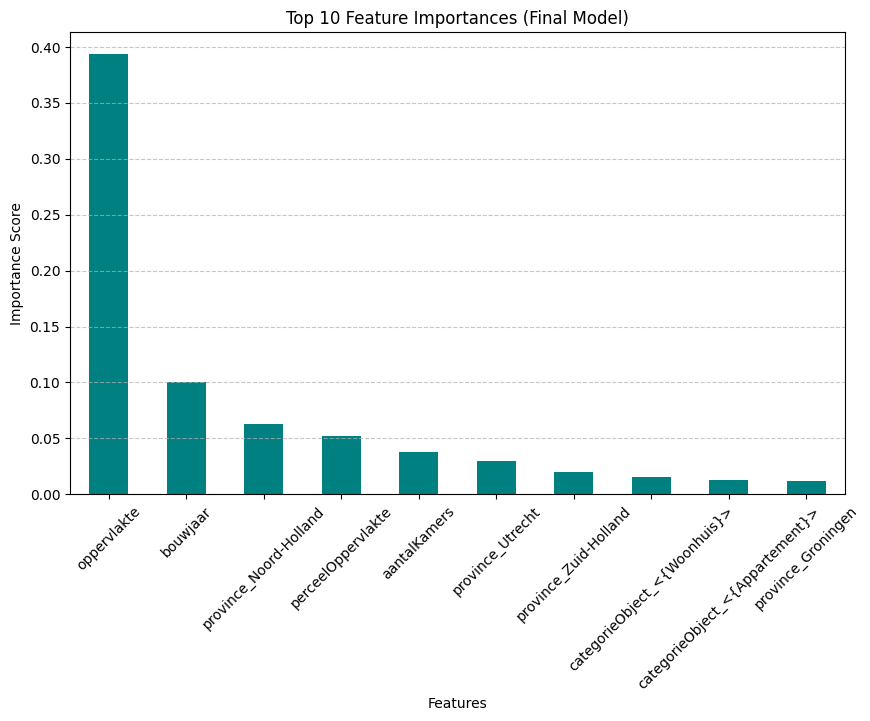

In [35]:
#source datacamp (Shafi, 2024)

# Ensure X_train is defined before using its column names
if 'X_train' not in locals():
    raise NameError("X_train is not defined. Ensure it is assigned before running this script.")

# Ensure that X_train_val is a DataFrame and extract actual feature names
if isinstance(X_train_val, pd.DataFrame):
    feature_names = X_train_val.columns.tolist()  # Extract actual feature names
else:
    feature_names = X_train.columns.tolist()[:X_train_val.shape[1]]  # Use original feature names

# Create a series containing feature importances from the model and actual feature names
feature_importances = pd.Series(rf_best_final.feature_importances_, index=feature_names)

# Sort the series in descending order to get the most important features on top
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Select the top 10 most important features
top_10_feature_importances = feature_importances_sorted.head(10)

# Plot a simple bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
top_10_feature_importances.plot.bar(color='teal')
plt.title('Top 10 Feature Importances (Final Model)')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)  # Rotates the feature names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;"> **Observation:**</span>

From teh above graph the top 10 features can be seen. The  `oppervlakte` (surface area), contributes to 40% to price prediction, which suggest that it is a dominant factor or has significant influence on the price estimations. Other top predictor is the **`bouwjaar` (construction year) followed by  `province_Noord-Holland`, `perceelOppervlakte`, and `aantalkamers` (number of rooms), but their impact is significantly lower**. 

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 5.5 Conclusion
</span>


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;"> **Observation: on the final model**</span>

| **Metric**                         | **Training + Validation** | **Test Set**  |
|-------------------------------------|--------------------------|---------------|
| **Mean Squared Error (MSE)**        | 0.1561                   | 0.2610        |
| **Mean Absolute Error (MAE)**       | 0.3017                   | 0.3845        |
| **R² Score**                        | 0.8439                   | 0.7390        |


The difference in MSE suggest that the model performs **better on training data**, but there might be **minor overfitting**. While the difference in R2 shows that the model achieved a **84.4% of the variance in training data** and **73.9% in test data**, which indicates that the model **generalizes well** but could still be improved. Additionally, the MAE score indicates that the model’s **average prediction error increases** when tested on unseen data, this could be because the predictions are not 100% accurate and have room for **further improvements**.


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">6. ANN Model </span>

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 6.1 Importing libraries
</span>


In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from keras_tuner import RandomSearch
from keras_tuner import HyperParameters
import random 
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 6.2 Hyperparameters tuning for the ANN model
</span>


### 6.2.1 Tuning function



<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">Explanation of Keras Tuner Hyperparameter Tuning</span>

- **Tuning Method:** This function uses **Keras Tuner**, which performs a random search to try many hyperparameter combinations automatically.
- **The keras tuner** adjusts the number of layers from 1 to 5, neurons per layer from 32 to 256 and dropout rates. 
- **The funtion** also uses 3 different optimzers, namely Adam, SGD, and RMSprop which updates the model’s weights during training. The Adam optimizer adapts its learning rate for each parameter, to speed up the learning process. While, SGD uses a straightforward update to smooth out the learning process. RMSprop adjusts learning rates based on recent gradients to better handle changing dynamics. By implementing these 3 optimizers in the tuning funtion increases the chance of finding the best hyperparameters for the ANN model. 

In [ ]:
# source Ruta & adapted by chatgpt


# Define the custom hypermodel class
class MyTuner(kt.HyperModel):
    def build(self, hp):
        model = Sequential()

        # Search space for the number of layers (1 to 5)
        num_layers = hp.Int('num_layers', min_value=1, max_value=5)
        for i in range(num_layers):
            # Search space for neurons (32 to 256)
            neurons = hp.Int(f'neurons_layer_{i+1}', min_value=32, max_value=256, step=32)
            model.add(Dense(neurons, activation="relu"))
            model.add(Dropout(rate=hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))  # Tune dropout

        model.add(Dense(1, activation='linear'))  # Output layer

        # Search space for learning rate
        learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])

        # Search space for optimizers
        optimizer_choice = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])
        if optimizer_choice == 'adam':
            optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        elif optimizer_choice == 'sgd':
            optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
        else:
            optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)

        model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice('batch_size', [16, 32, 64, 128]),  # Tunable batch size
            **kwargs,
        )


### 6.2.2 Initialize the tuner with 35 trials

The tuner was set before to 20 however this yield an mSE of 0.4 approximately, therefore the tuner was set to higher number of trials to increas ethe chance of getting better results or lower MSE score, it was set to 35 trials. In this tuner it specifie sthat the 'objective' or main goal is to reduce the validation loss in order to find the best hyperparameters.

In [ ]:
# Initialize the tuner with 35 trials
tuner = kt.RandomSearch(
    hypermodel=MyTuner(),
    objective='val_loss',
    max_trials=35,  # Increased search space, 1st trial was 20, however this was increased to get a better result  
    overwrite=True,
    directory="tuning_results",
    project_name="tune_hypermodel"
)

### 6.2.3 Setting early stopping to the function

The function includes an early stopping that regulates the validation loss, when there is no improvement after (patience= 5) **5 rounds**, it stops training to prevent overfitting and saves time by stopping the model from learning unnecessary patterns. 

In [ ]:

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

### 6.2.4  Starting the hyperparameter tuning process

In [ ]:
 #Perform the search
tuner.search(
    X_train_scaled,
    y_train,
    epochs=50,  # Increased training epochs
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr]  # Both callbacks added
)


Trial 35 Complete [00h 06m 01s]
val_loss: 0.34485921263694763

Best val_loss So Far: 0.2813092768192291
Total elapsed time: 02h 04m 37s


### 6.2.5 Retrieving the best hyperparameters

In [ ]:
# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best number of layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Best number of neurons in layer {i+1}: {best_hps.get(f'neurons_layer_{i+1}')}")
print(f"Best batch size: {best_hps.get('batch_size')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

Best number of layers: 3
Best number of neurons in layer 1: 160
Best number of neurons in layer 2: 96
Best number of neurons in layer 3: 256
Best batch size: 16
Best learning rate: 0.0001


To save time, these values will be saved and used for training the model in chapter 6.3.

### 6.2.6 Saving the Best hyperparameters in a separate file

Due to time contraint as it takes hours to keep testing the code to get the best hyperparameters, the end result or the best hyperparameter obtained is saved into a file, to use it later in the model fitting part.

In [ ]:
import json

# Retrieve the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Convert hyperparameters to a dictionary
best_hps_dict = {
    "num_layers": best_hps.get('num_layers'),
    "batch_size": best_hps.get('batch_size'),
    "learning_rate": best_hps.get('learning_rate'),
}

# Save the number of neurons in each layer dynamically
for i in range(best_hps.get('num_layers')):
    best_hps_dict[f"neurons_layer_{i+1}"] = best_hps.get(f'neurons_layer_{i+1}')

# Define the file path
save_path = r"C:\Users\josel\OneDrive\Documents\best_hyperparameters_ANN_model_last.json"

# Save to JSON file
with open(save_path, "w") as f:
    json.dump(best_hps_dict, f, indent=4)

print(f"✅ Best hyperparameters saved at: {save_path}")


✅ Best hyperparameters saved at: C:\Users\josel\OneDrive\Documents\best_hyperparameters_ANN_model_last.json


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 6.3 Fitting the model on the train data
</span>


### 6.3.1 Uploading the best Hyperparameters

In [37]:
import json

# Define the file path where the best hyperparameters were saved
save_path = r"C:\Users\josel\OneDrive\Documents\best_hyperparameters_ANN_model_last.json"

# Load the best hyperparameters from the JSON file
try:
    with open(save_path, "r") as f:
        best_hps_dict = json.load(f)
    
    # Display the best hyperparameters
    print("✅ Best Hyperparameters Retrieved:")
    for key, value in best_hps_dict.items():
        print(f"{key}: {value}")

except FileNotFoundError:
    print(f"❌ Error: File not found at {save_path}. Ensure the file exists and try again.")


✅ Best Hyperparameters Retrieved:
num_layers: 3
batch_size: 16
learning_rate: 0.0001
neurons_layer_1: 160
neurons_layer_2: 96
neurons_layer_3: 256


### 6.3.2 training the model

The model will be first trained on the training dataset only. This allows the model to learn fundamental patterns from a smaller dataset without excessive complexity. After the model will be fitted on the combined dataset (train + validation) which can help reduce variance by providing more examples, and improve generalization without overfitting.

This model uses the best hyperparameters found during tuning and consists of **three hidden layers with ReLU activation and batch normalization**, is optimized with the Adam optimizer and it is trained using early stopping and learning rate reduction of 0.001 for better performance.

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# Set random seeds for reproducibility
import random
import numpy as np

random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Build and train the model with best hyperparameters
def build_best_model():
    model = Sequential()

    # Best hyperparameters retrieved
    num_layers = 3  
    neurons_layer_1 = 160  
    neurons_layer_2 = 96  
    neurons_layer_3 = 256  
    learning_rate = 0.0001  

    # Add layers based on the best hyperparameters
    model.add(Dense(neurons_layer_1, activation="relu"))
    model.add(BatchNormalization())
    
    model.add(Dense(neurons_layer_2, activation="relu"))
    model.add(BatchNormalization())
    
    model.add(Dense(neurons_layer_3, activation="relu"))
    model.add(BatchNormalization())

    # Output layer for regression
    model.add(Dense(1, activation='linear'))

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        loss='mean_squared_error',
        optimizer=optimizer,
        metrics=['mae']
    )
    return model

# Rebuild the model
best_model = build_best_model()

# Best batch size retrieved
best_batch_size = 16  

# Train the model
history = best_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,  # Allow sufficient epochs for training
    batch_size=best_batch_size,
    validation_data=(X_val_scaled, y_val),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)  # Adjust learning rate dynamically
    ]
)


Epoch 1/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.0286 - mae: 0.7899 - val_loss: 0.4340 - val_mae: 0.5169 - learning_rate: 1.0000e-04
Epoch 2/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.4653 - mae: 0.5358 - val_loss: 0.3405 - val_mae: 0.4527 - learning_rate: 1.0000e-04
Epoch 3/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3865 - mae: 0.4862 - val_loss: 0.3137 - val_mae: 0.4334 - learning_rate: 1.0000e-04
Epoch 4/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.3530 - mae: 0.4644 - val_loss: 0.3041 - val_mae: 0.4269 - learning_rate: 1.0000e-04
Epoch 5/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3324 - mae: 0.4501 - val_loss: 0.2957 - val_mae: 0.4197 - learning_rate: 1.0000e-04
Epoch 6/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3199 - mae: 0.4413 - val_loss: 0.2905 - val_mae: 0.4151 - learning_rate: 1.0000e-04
Epoch 7/50
7488/7488 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.3078 - mae: 0.4331 - val_loss: 0.2891 - v

### 6.3.3 Visualizing the loss

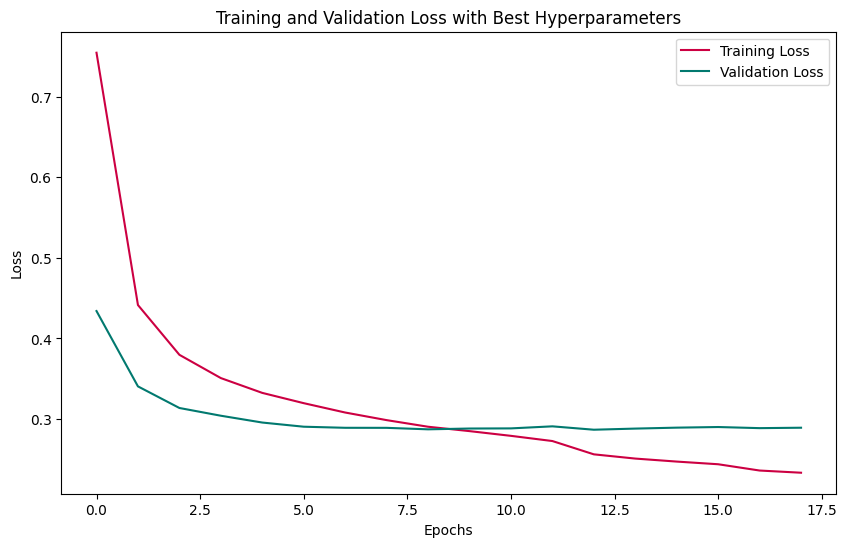

In [39]:
# Visualize training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='#CC0042')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#01796F')
plt.title('Training and Validation Loss with Best Hyperparameters')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">Observation:</span>

In the above graph it can be seen that the training and validation loss steadily decreases, meaning that the model is successfully learning. And it can also be seen that the point where the validation loss is at its lowest is at 12 epoch approximately. 

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 6.4 Final model
</span>


This model uses the best hyperparameters found during tuning and consists of **three hidden layers with ReLU activation and batch normalization**, is optimized with the Adam optimizer and it is trained using early stopping and learning rate reduction of 0.001 for better performance.

### 6.4.1 Fitting the model on teh merged validation and train dataset

In [40]:
# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
# Build the final model with best hyperparameters
final_model_ANN = Sequential()

# Add layers with the best hyperparameters
final_model_ANN.add(Dense(160, activation="relu"))  # Best neurons in Layer 1
final_model_ANN.add(BatchNormalization())
final_model_ANN.add(Dense(96, activation="relu"))  # Best neurons in Layer 2
final_model_ANN.add(BatchNormalization())
final_model_ANN.add(Dense(256, activation="relu"))  # Best neurons in Layer 3
final_model_ANN.add(BatchNormalization())

# Output layer
final_model_ANN.add(Dense(1, activation='linear'))

# Compile the model
final_model_ANN.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Best learning rate
    loss='mean_squared_error',
    metrics=['mae']
)

# Train the model on the combined dataset for the best number of epochs
history_final = final_model_ANN.fit(
    X_train_val,
    y_train_val,
    epochs=7,  # Best number of epochs determined from visualization
    batch_size=64,  # Best batch size
    validation_data=(X_test_scaled, y_test)  # Test dataset as validation
)

Epoch 1/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.6195 - mae: 0.6010 - val_loss: 0.3867 - val_mae: 0.4857
Epoch 2/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3296 - mae: 0.4440 - val_loss: 0.3347 - val_mae: 0.4481
Epoch 3/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3059 - mae: 0.4271 - val_loss: 0.3337 - val_mae: 0.4478
Epoch 4/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2911 - mae: 0.4157 - val_loss: 0.3084 - val_mae: 0.4265
Epoch 5/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2785 - mae: 0.4062 - val_loss: 0.2988 - val_mae: 0.4176
Epoch 6/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2687 - mae: 0.3986 - val_loss: 0.2986 - val_mae: 0.4169
Epoch 7/7
2496/2496 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2600 - mae: 0.3920 - val_loss: 0.2933 - val_mae: 0.4136


### 6.4.2 Model evaluation

4992/4992 ━━━━━━━━━━━━━━━━━━━━ 5s 925us/step
4992/4992 ━━━━━━━━━━━━━━━━━━━━ 4s 891us/step - loss: 0.2424 - mae: 0.3758
Combined Training Loss: 0.2416
Combined Training MAE: 0.3754
Combined Training MSE: 0.2416
Combined Training R²: 0.7584
1248/1248 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step
Test Loss : 0.2933
Test MAE : 0.4136
Test MSE : 0.2933
Test R² : 0.7067


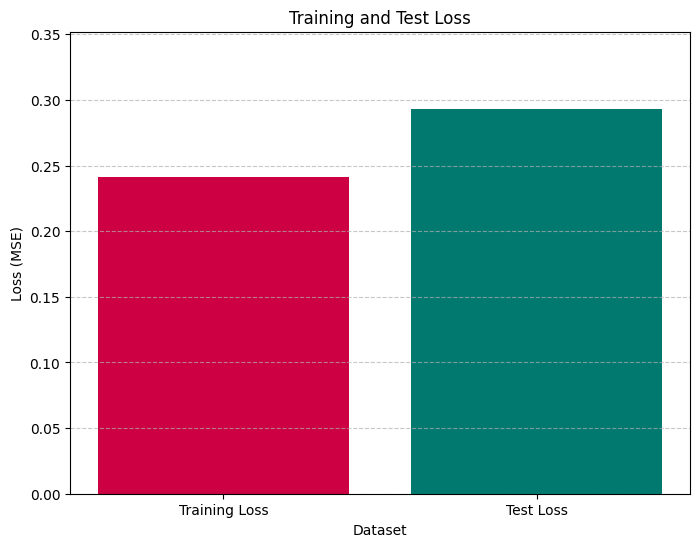

In [41]:
# Convert targets to numpy arrays with the correct shape
y_train_val = np.array(y_train_val).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Evaluate on the combined training dataset
y_combined_pred = final_model_ANN.predict(X_train_val)
train_loss, train_mae = final_model_ANN.evaluate(X_train_val, y_train_val)
train_mse = mean_squared_error(y_train_val, y_combined_pred)
train_r2 = r2_score(y_train_val, y_combined_pred)

# Print combined training metrics
print(f"Combined Training Loss: {train_loss:.4f}")
print(f"Combined Training MAE: {train_mae:.4f}")
print(f"Combined Training MSE: {train_mse:.4f}")
print(f"Combined Training R²: {train_r2:.4f}")

# Evaluate on the test dataset using the correct model variable
y_test_pred_ann = final_model_ANN.predict(X_test_scaled).reshape(-1)  # Ensure correct shape
test_loss, test_mae = final_model_ANN.evaluate(X_test_scaled, y_test, verbose=0)
test_mse = mean_squared_error(y_test, y_test_pred_ann)
test_r2 = r2_score(y_test, y_test_pred_ann)

# Print test metrics
print(f"Test Loss : {test_loss:.4f}")
print(f"Test MAE : {test_mae:.4f}")
print(f"Test MSE : {test_mse:.4f}")
print(f"Test R² : {test_r2:.4f}")

# Loss values for training and test datasets
loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Test Loss']

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['#CC0042', '#01796F'])
plt.title('Training and Test Loss')
plt.ylabel('Loss (MSE)')
plt.xlabel('Dataset')
plt.ylim(0, max(loss_values) * 1.2)  # Adjust y-axis for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Save final test metrics for comparison at the end
test_mse_ann = test_mse
test_mae_ann = test_mae
test_r2_ann = test_r2


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Key note:**</span>

The model achieved a MSE of 0.2416 and an R² of 0.7584 for the merged data set, which indicates a good fit. While, on the test set, it has a slightly higher MSE of 0.2933 with an R² of 0.7067, which is a bit less accurate, but still generalizes good.

---
---

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">7. XGBoost Regressor </span>

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Reason for selecting this model:**</span>

- XGBoost was chosen as the because it can capture complex relationships in the data, as teh dataset contains numerical and categorical mix. 
- Also as the price is not purely linear, e.g. price does not increase as the postcodes increase, therefore  like location XGBoost can capture non-linear dependencies through its decision-tree-based structure.
- And for this step no scaling is needed as XGBoost is based on decision trees, which are not sensitive to feature scaling.

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 7.1 Importing libraries needed for XGBoost Regressor
</span>


In [42]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_absolute_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb 

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Short Explanation of Each Library:**</span>
- **`optuna`** → This library is an automatic **hyperparameter optimization** library that helps in finding the best model settings 
- **`xgboost` (XGBRegressor)** → This is a **gradient boosting** library used for predictive modeling.
- **`sklearn.metrics.mean_squared_error`** → This function calculates the **Mean Squared Error (MSE)**, which gives the average squared difference between actual and predicted values (**lower MSE = better model performance**).



## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 7.2 Performing hyperparameter tuning
</span>


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Reason for choosing Optuna:**</span>

Optuna can efficiently searches the hyperparameter space using Bayesian optimization (TPE), which makes it much faster and smarter than traditional grid or random search. It also helps saving computation time and it optimizes critical parameters like n_estimators, max_depth, and learning_rate.

### 7.2.1 Hyperparameter tuning with Optuna

In [ ]:
import time
import numpy as np
import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#source chatgpt

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 1.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 1.0, log=True)
    }

    
    # Initialize the XGBoost regressor with current hyperparameters
    model = xgb.XGBRegressor(**params, objective="reg:squarederror", random_state=42, n_jobs=-1)
    
    # Use 5-Fold Cross-Validation to evaluate MSE (note: cross_val_score returns negative MSE)
    scores = cross_val_score(model, X_train_scaled, y_train, scoring="neg_mean_squared_error", cv=5)
    mse = -np.mean(scores)
    
    return mse

# Create an Optuna study to minimize MSE and optimize the hyperparameters
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # Increase n_trials for a more exhaustive search

print("Best hyperparameters:", study.best_trial.params)
print("Best CV MSE:", study.best_trial.value)

# Train the best model on the full training set
best_params_xgb = study.best_trial.params
xgb_best = xgb.XGBRegressor(**best_params_xgb, objective="reg:squarederror", random_state=42, n_jobs=-1)
xgb_best.fit(X_train_scaled, y_train)

# Predict on training and validation sets
y_train_pred_xgb= xgb_best.predict(X_train_scaled)
y_val_pred_xgb = xgb_best.predict(X_val_scaled)

# Compute MSE and R² scores
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
val_mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

# Print final results
print("\n📊 **Final Model Performance**")
print(f"🔹 Training Loss (MSE): {train_mse_xgb:.4f}")
print(f"🔹 Validation Loss (MSE): {val_mse_xgb:.4f}")
print(f"🔹 Training R² Score: {train_r2_xgb:.4f}")
print(f"🔹 Validation R² Score: {val_r2_xgb:.4f}")


Traceback (most recent call last):
  File "c:\Users\josel\.vscode\extensions\ms-python.python-2025.0.0-win32-x64\python_files\python_server.py", line 133, in exec_user_input
    retval = callable_(user_input, user_globals)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<string>", line 3, in <module>
ModuleNotFoundError: No module named 'optuna'



### 7.2.2 Saving the best hyperparameters

In [ ]:
import json

# Define the file path where you want to save the best parameters
file_path = r"C:\Users\josel\OneDrive\Documents\GitHub\best_params_xgb.json"

# Save the best hyperparameters from the Optuna study to a JSON file
with open(file_path, "w") as f:
    json.dump(study.best_trial.params, f)

print("Best parameters saved successfully!")


Best parameters saved successfully!


### 7.2.3 Loading the best hyperparameters

In [43]:
import json

# Define the file path where the best parameters were saved
file_path = r"C:\Users\josel\OneDrive\Documents\GitHub\best_params_xgb.json"

# Load the best hyperparameters from the JSON file
with open(file_path, "r") as f:
    best_params_xgb_saved = json.load(f)

print("Loaded best parameters:", best_params_xgb_saved)


Loaded best parameters: {'n_estimators': 174, 'max_depth': 11, 'learning_rate': 0.03964948086380876, 'subsample': 0.7750401371818126, 'colsample_bytree': 0.8205699716327125, 'gamma': 0.4756091185215541, 'min_child_weight': 5, 'reg_alpha': 3.9670384414794106e-08, 'reg_lambda': 0.021999410436198446}


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Explanation of the output:**</span>


Based on the best hyperparameters in the next section (5.3) the XGBoost Regressor model will be trained. The best parameters are used to balance the model's complexity, prevent overfitting, and improve predictive accuracy.




## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 7.3 Model fitting on the train data
</span>


The model will be first trained on the training dataset only. This allows the model to learn fundamental patterns from a smaller dataset without excessive complexity. After the model will be fitted on the combined dataset (train + validation) which can help reduce variance by providing more examples, and improve generalization without overfitting.

In [44]:
# Train the model with the best parameters on the cleaned training set
xgb = XGBRegressor(
    n_estimators=best_params_xgb_saved["n_estimators"],
    max_depth=best_params_xgb_saved["max_depth"],
    learning_rate=best_params_xgb_saved["learning_rate"],
    reg_alpha=best_params_xgb_saved["reg_alpha"],
    reg_lambda=best_params_xgb_saved["reg_lambda"],
    random_state=42
)

# Fit the model on the cleaned training data
xgb.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03964948086380876,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=174, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 7.4 XGBoost Loss Evaluation & Visualization
</span>


Training Loss (MSE): 0.07062927501939893
Validation Loss (MSE): 0.23937373301566642
Training R² Score: 0.9293707249806011
Validation R² Score: 0.7606262669843336


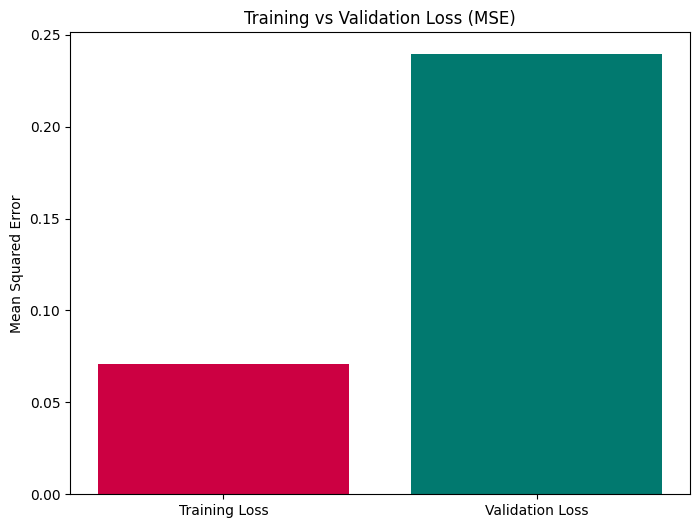

In [45]:
# Calculate the predictions on the training and validation sets
y_train_pred_xgbfinal = xgb.predict(X_train_scaled)  # Predictions on the training set
y_val_pred_xgbfinal = xgb.predict(X_val_scaled)      # Predictions on the validation set

# Compute the mean squared error for training and validation sets
train_loss_xgbf = mean_squared_error(y_train, y_train_pred_xgbfinal)
val_loss_xgbf = mean_squared_error(y_val, y_val_pred_xgbfinal)

# Compute the R² scores for training and validation sets
train_r2_xgbf = r2_score(y_train, y_train_pred_xgbfinal)
val_r2_xgbf = r2_score(y_val, y_val_pred_xgbfinal)

# Print the MSE and R² scores
print("Training Loss (MSE):", train_loss_xgbf)
print("Validation Loss (MSE):", val_loss_xgbf)
print("Training R² Score:", train_r2_xgbf)
print("Validation R² Score:", val_r2_xgbf)

# Plot the losses
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(["Training Loss", "Validation Loss"], [train_loss_xgbf, val_loss_xgbf], color=['#CC0042', '#01796F'])
plt.title("Training vs Validation Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.show()


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Observation:**</span>

From teh barchart above and looking at the MSE and R2 values, the model shows strong performance on the training set with a MSE of 0.07 and a R² of 0.93, and on the validation set (MSE=0.24, R²=0.76) it generalizes reasonably.

---
---




## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 7.5 Model fitting on the train and validation data 
</span>


In this section the model will be fitted on the X_train_val and y_train_val, which is teh merged dataset of the train and validation data together. As the model was first trained on the training dataset to learn patterns. And now with the combined dataset the can learn from a larger  dataset, which can help the model in making better predictions or generalization while also reducing the risk of overfitting to the original training set. Also, by retraining the model, the model can benefit from additional insights present in the validation set, which can help the model to perform better.

In [46]:
# Retrain the final model using the optimized hyperparameters on the full training dataset (train + validation)
merged_data_xgb = XGBRegressor(
    n_estimators=best_params_xgb_saved["n_estimators"],
    max_depth=best_params_xgb_saved["max_depth"],
    learning_rate=best_params_xgb_saved["learning_rate"],
    reg_alpha=best_params_xgb_saved["reg_alpha"],
    reg_lambda=best_params_xgb_saved["reg_lambda"],
    random_state=42
)

merged_data_xgb.fit(X_train_val,y_train_val)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03964948086380876,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=174, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 7.6 XGBoost Loss Evaluation & Visualization on the merged_data_xgb
</span>


Training + Validation MSE: 0.08422217484464237
Test MSE: 0.23027161154957565
Training + Validation MAE: 0.2217261765598919
Test MAE: 0.3561805732511182
Training + Validation R² Score: 0.9157778251553577
Test R² Score: 0.7697283884504245


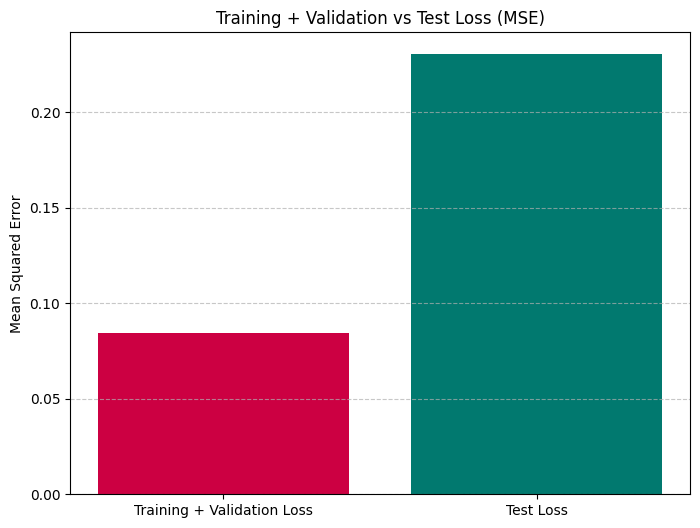

In [47]:

# Fit the model on the merged training and validation set
merged_data_xgb.fit(X_train_val, y_train_val)  

# Generate predictions for the merged training-validation set and test set
y_train_val_pred = merged_data_xgb.predict(X_train_val)  
y_test_pred = merged_data_xgb.predict(X_test_scaled)           

# Compute the Mean Squared Error (MSE) for both datasets
train_val_mse = mean_squared_error(y_train_val, y_train_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Compute the Mean Absolute Error (MAE) for both datasets
train_val_mae = mean_absolute_error(y_train_val, y_train_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Compute the R² scores for both datasets
train_val_r2 = r2_score(y_train_val, y_train_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Training + Validation MSE:", train_val_mse)
print("Test MSE:", test_mse)
print("Training + Validation MAE:", train_val_mae)
print("Test MAE:", test_mae)
print("Training + Validation R² Score:", train_val_r2)
print("Test R² Score:", test_r2)

# Plot only the MSE for Training + Validation vs Test Set
plt.figure(figsize=(8, 6))
plt.bar(["Training + Validation Loss", "Test Loss"], [train_val_mse, test_mse], color=['#CC0042', '#01796F'])
plt.title("Training + Validation vs Test Loss (MSE)")
plt.ylabel("Mean Squared Error")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Store the test performance metrics for further use
test_mse_xgb = test_mse
test_mae_xgb = test_mae
test_r2_xgb = test_r2


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Analysis and Evaluation of Model Performance**</span>


In short the model has a strong performance on the combined training+validation set (MSE=0.084, R²=0.916) while still having a reasonable generalization on the test set with a MSE of 0.230 and a R² of 0.770.

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">8. Evaluating the models </span>

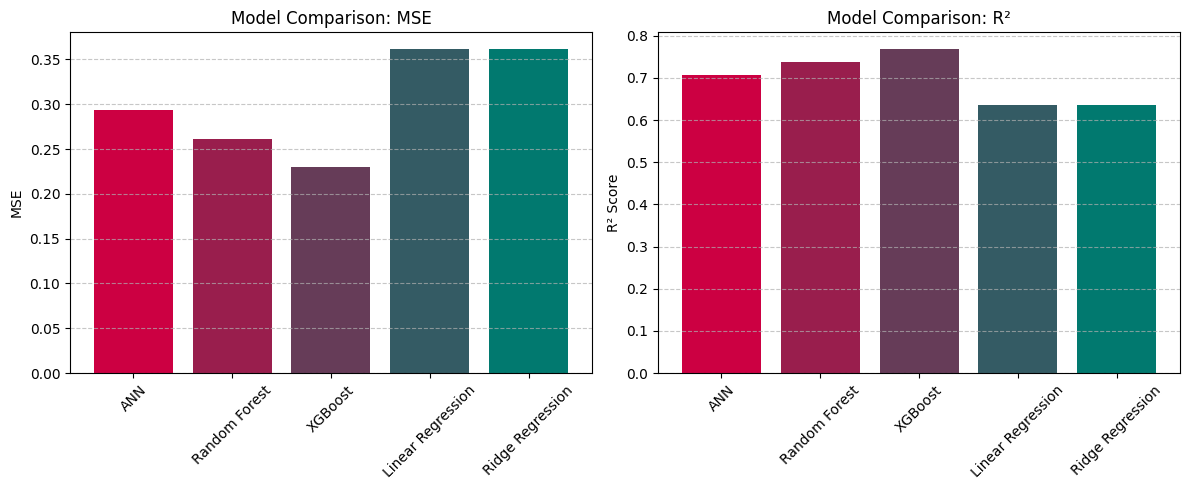

In [48]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
#source chatgpt

# Example metric arrays (replace with your actual values)
models = ['ANN', 'Random Forest', 'XGBoost', 'Linear Regression', 'Ridge Regression']
mse_values = [test_mse_ann, test_mse_rf, test_mse_xgb, test_mse_lr, test_mse_ridge]
r2_values = [test_r2_ann, test_r2_rf, test_r2_xgb, test_r2_lr, test_r2_ridge]

# Create a gradient of colors between #CC0042 and #01796F
color1 = mcolors.to_rgb("#CC0042")  # Reddish
color2 = mcolors.to_rgb("#01796F")  # Teal
colors = []
for i in range(len(models)):
    t = i / (len(models) - 1)  # interpolation factor
    # Interpolate each RGB channel
    r = color1[0] + (color2[0] - color1[0]) * t
    g = color1[1] + (color2[1] - color1[1]) * t
    b = color1[2] + (color2[2] - color1[2]) * t
    colors.append(mcolors.to_hex([r, g, b]))

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Plot MSE ---
axes[0].bar(models, mse_values, color=colors)
axes[0].set_title('Model Comparison: MSE')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Plot R² ---
axes[1].bar(models, r2_values, color=colors)
axes[1].set_title('Model Comparison: R²')
axes[1].set_ylabel('R² Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Evaluation of the Models Performance**</span>

From the graph above it can be seen that the XGBoost model has the **lowest MSE**, which means that it makes the smallest average error when predicting the target values. XGBoost has also the **highest R²** value which indicates that it captures most of the variance in the data compared to the other models. A high variance is relevant because the model is capture a larger portion of the data’s variability, which is important to explain the reason or factors that cause a change in the target values. The less efficient models are the Linear regression and Ridge regression model as the yield the highest MSE score and lowest R2 score. ANN and Random forest model however differ sliglty from each, but still achieved a high R2 score and a low MSE score. 

In short, form the test results XGBoost is the best model, and the explainability will be done for this model. 

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">9. Explainability part 1: SHAP </span>

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 9.1 Importing Libraries
</span>


In [49]:
import shap

## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 9.2 Initializing the SHAP explainer
</span>


In this section SHAP (SHapley Additive exPlanations) i used to understand how each feature in the XGBoost model contributes to predicting property prices.

In [50]:

# Create a SHAP explainer for the trained XGBoost model
shap_explainer = shap.TreeExplainer(merged_data_xgb)

# Compute SHAP values on the test set
shap_values = shap_explainer.shap_values(X_test_scaled)


## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 9.3 Global Explainability 
</span>


The global explainability, explains how a model makes predictions across its entire dataset rather than for a single prediction. It shows the level of importance of each feature and the model’s general decision patterns.

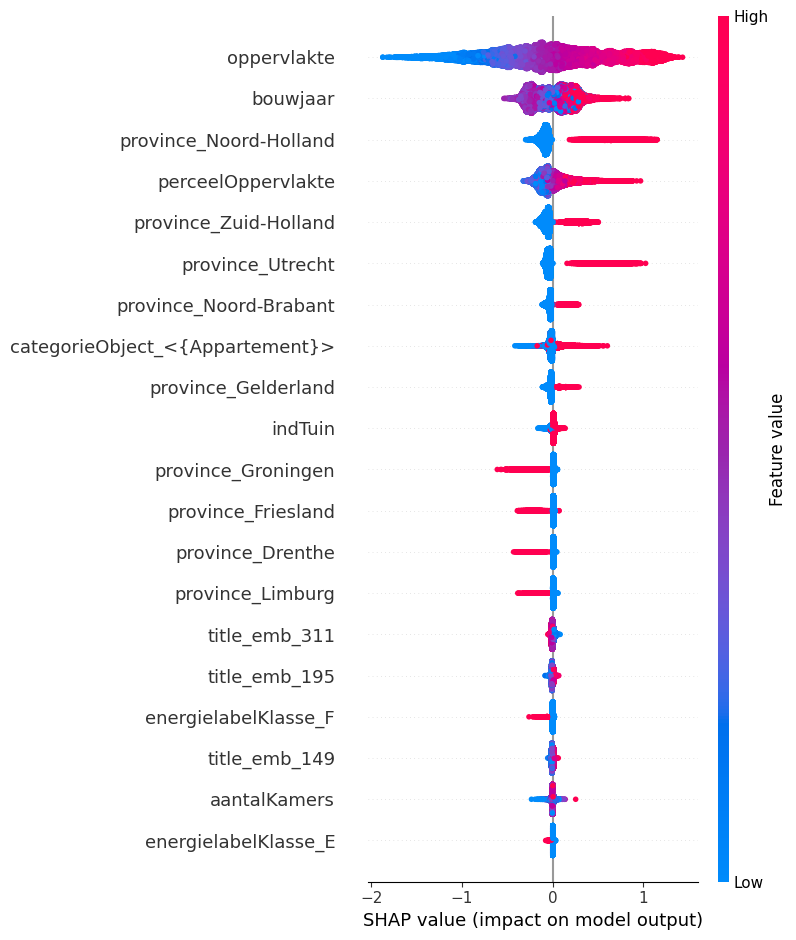

In [51]:
# Source datacamp
#  Plot the summary
shap.summary_plot(shap_values, X_test_scaled, feature_names=X_test.columns, max_display=20)

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Interpretability of the plot:**</span>

Below a short description is given on what the x and y axis indicate from the SHAP summary plot.

<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:24px;">**Color Coding (Blue to Red)**</span>
- **Blue Dots:** Low feature values (e.g., smaller `oppervlakte`).  
- **Red Dots:** High feature values (e.g., larger `oppervlakte`).  

<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:24px;">**SHAP Values (X-axis)**</span>
- positive SHAP = increase the predicted price.  
- negative SHAP = decreases the predicted price.  


 <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Analysis:**</span>

The summary plot above shows the feature importance of each column or feature from the XGBoost model. It plots the most important features of the model, as the y-axis shows the level of importance of each feature and the x-axis indicates the influence of each feature on the target. So the shap value, describes the relationship of teh feature with the target, if its negative it means that the a negative shap value for a certain features leads to a lower outcome, in this case would be a lower price and vice versa. Moreover, the results show that “oppervlakte” and “bouwjaar” play major roles in determining the results. Howerve, `energielabelKlasse_E` has the least impact on the on price predictions.

<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:24px;">**Key Insights**</span>
- **`oppervlakte` (Floor Area):** Larger property sizes increases the price predictions.  
- **`bouwjaar` (Construction Year):** Newer properties are related with higher predicted prices.  
- **Location Features** (e.g., `province_Noord-Holland`, `province_Zuid-Holland`): These property locations have a strong effect on the predicted price.  
- **`perceelOppervlakte` (Plot Size):** A larger parcel size also increases the predicted price.  
- **Energy Label Classes** (`energielabelKlasse`): While less influential, they still play a role in fine-tuning the final prediction.



## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 9.4 Local Explainability 
</span>


The **local explainability** explains the individual contribution of each features with the model's prediction. It shows how each feature's SHAP value influences the model's output for **one particular prediction**. 

Two plots will be used to describe this namely the:
- Decision plot
- Force plot

### 9.4.1 Force Plot

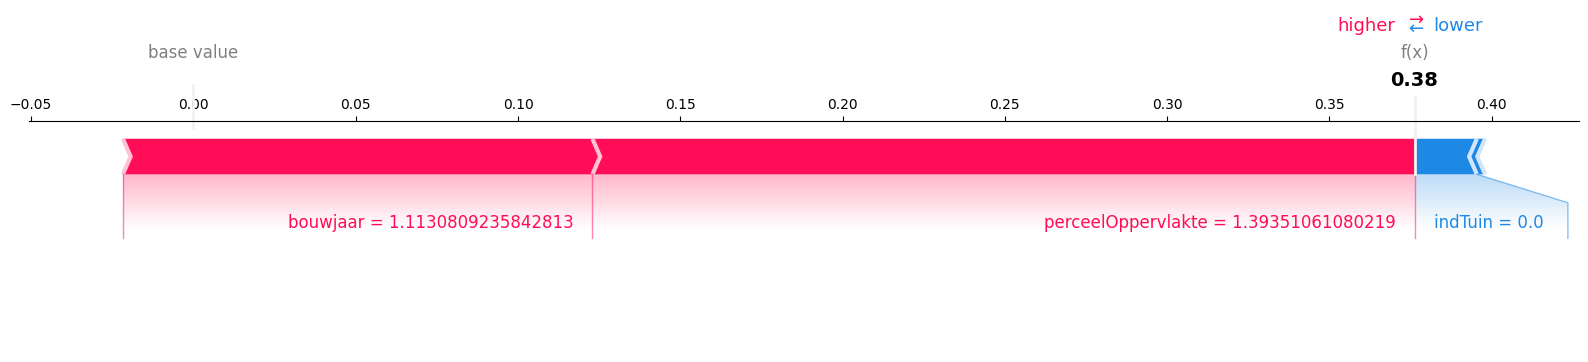

In [68]:
#source datacamp
import shap
import matplotlib.pyplot as plt

# Select the first test sample and its SHAP values
selected_features = X_test.iloc[0, :4]  # First 5 feature values
selected_shap_values = shap_values[0][:4]  # SHAP values for the first 5 features
feature_names = X_test.columns[:4].tolist()  # Get the first 5 feature names

# Generate SHAP force plot with real feature names
shap.force_plot(
    base_value=shap_explainer.expected_value, 
    shap_values=selected_shap_values, 
    features=selected_features,
    feature_names=feature_names,  # Use real feature names
    matplotlib=True  # Ensures a white-background Matplotlib plot
)

plt.show()  # Display the plot


#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Interpretability of the plot:**</span>


This force plot explains **how different features influenced the predicted property price**.  

- **`bouwjaar` (Construction Year) = 1.11** → Means that t means this feature shifted the scaled price by +1.1 towards a higher value. 
- **`perceelOppervlakte` (Plot Area) = 1.39** →  Same for parcel size it has a higher magnitude or influnce on teh price prediction. 
- **`indTuin` (Garden Indicator) = 0.0** → However, having a garden has 0 influce, meaning it has no effect on the price. 
- The **number `0.37`** is the base value which is t’s the **average predicted price** across all properties, and based on this value the model add or sucstracts based  on the house’s features.

---
---

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">10. Explainability part 2: Counterfactual </span>

The **counterfactual explanation** describes how a model makes decisions by showing what small changes in the input would lead to a different prediction. So for **property price predictions**, a **counterfactual explanation** would show what changes in property features (like parcel size, number of bedrooms, or location) would be needed to reach a different predicted price.




## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 10.1 Generating Global Counterfactual Explanations for XGBoost Predictions
</span>


### 10.1.1 Showing the changes in features

In [ ]:
#Source Ruta - adapted by chatgpt


# Step 1: Define the prediction function
def predict_fn(x):
    prediction = merged_data_xgb.predict(x)  # Get the prediction (1D array)
    return prediction.reshape(-1, 1)  # Reshape to 2D array for compatibility

# Step 2: Define the counterfactual generator
def generate_counterfactual(instance, model, target_value, max_iter=1000, step_size=0.01, tolerance=1e-3):
    """
    Generate counterfactuals by iteratively modifying input features.

    Args:
        instance (np.array): Scaled feature vector of the instance.
        model (callable): Prediction function.
        target_value (float): Desired target value for the regression model.
        max_iter (int): Maximum iterations for optimization.
        step_size (float): Incremental step size for feature changes.
        tolerance (float): Stop criterion when error is below this value.

    Returns:
        np.array: Counterfactual feature values.
    """
    cf_instance = instance.copy()
    
    for i in range(max_iter):
        prediction = model(cf_instance)[0, 0]  # Model prediction
        error = target_value - prediction  # Difference from target

        if abs(error) < tolerance:
            print(f"✅ Counterfactual found in {i} iterations.")
            return cf_instance

        # Adjust feature values
        adjustment = np.sign(error) * step_size
        cf_instance += adjustment

    print("⚠️ Counterfactual not found within the iteration limit.")
    return cf_instance

# Step 3: Select a scaled instance (ensure X_test_scaled is an array)
instance_idx = 3  # Example index

try:
    original_instance = X_test_scaled.to_numpy()[instance_idx].reshape(1, -1)
except AttributeError:
    original_instance = X_test_scaled[instance_idx].reshape(1, -1)  # If already an array

# Set a target value (adjust based on your use case)
target_value = 1.5  # Example: Move towards a high prediction in the scaled range

# Generate counterfactual
counterfactual_instance = generate_counterfactual(
    original_instance, 
    predict_fn, 
    target_value, 
    max_iter=5000,  # Increased maximum iterations
    step_size=0.05,  # Larger step size for faster convergence
    tolerance=1e-2  # Relaxed tolerance
)

# Print results
print("Original Instance:", original_instance)
print("Counterfactual Instance:", counterfactual_instance)


✅ Counterfactual found in 2 iterations.
Original Instance: [[1.25552394e-01 1.00000000e+00 7.84540128e-01 8.57142857e-02
  3.81639165e-17 2.66976830e-01 3.44758465e-01 5.08022936e-01
  4.13028336e-01 3.77816095e-01 4.02115548e-01 5.86180558e-01
  5.84943092e-01 6.22351199e-01 5.50065121e-01 4.62986285e-01
  4.02444101e-01 4.61942576e-01 5.01482940e-01 5.05235897e-01
  4.52342641e-01 4.23088831e-01 6.41800550e-01 4.01924917e-01
  4.43225323e-01 4.89567204e-01 5.28789754e-01 4.66900771e-01
  4.91532474e-01 3.76071671e-01 4.15895275e-01 3.64959368e-01
  5.03445157e-01 4.19713962e-01 6.48273930e-01 5.33987611e-01
  4.86354324e-01 3.94213977e-01 4.97665413e-01 4.89797587e-01
  4.36068712e-01 5.07021210e-01 4.43816243e-01 4.74214782e-01
  5.08928522e-01 5.97963616e-01 4.77894712e-01 2.90811794e-01
  3.68014912e-01 5.29269697e-01 4.78721054e-01 3.69332740e-01
  5.26699049e-01 5.10441504e-01 3.80532632e-01 6.55913814e-01
  5.12546009e-01 4.04102393e-01 5.67841150e-01 4.21061501e-01
  5.7471271

### 10.1.2 Counterfactual differences per feature for unscaled data

In [87]:
import pandas as pd

# Ensure scaler exists and transform back to original feature space
try:
    original_unscaled = scaler.inverse_transform(original_instance)
    counterfactual_unscaled = scaler.inverse_transform(counterfactual_instance)
except NameError:
    print("Scaler is not defined. Please provide the scaler used for data preprocessing.")
    original_unscaled, counterfactual_unscaled = None, None

# Ensure X_test is available
try:
    feature_names = X_test.columns
except NameError:
    print("X_test is not defined. Please provide the dataset with feature names.")
    feature_names = None

# If both are available, proceed with analysis
if original_unscaled is not None and feature_names is not None:
    # Highlight feature changes
    changes = []
    for feature, original_value, cf_value in zip(feature_names, original_unscaled.flatten(), counterfactual_unscaled.flatten()):
        if original_value != cf_value:
            changes.append((feature, round(original_value, 2), round(cf_value, 2)))

    # Create DataFrame for changes
    changes_df = pd.DataFrame(changes, columns=["Feature", "Original Value", "Counterfactual Value"])

    # Side-by-side comparison
    original_df = pd.DataFrame(original_unscaled, columns=feature_names, index=["Original"])
    cf_df = pd.DataFrame(counterfactual_unscaled, columns=feature_names, index=["Counterfactual"])
    comparison = pd.concat([original_df, cf_df])

    # Display tables with borders
    from IPython.core.display import display, HTML

    print("\nSide-by-Side Comparison:")
    display(HTML(comparison.to_html(border=2)))



Side-by-Side Comparison:


,bouwjaar,indTuin,perceelOppervlakte,aantalKamers,aantalBadkamers,oppervlakte,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,title_emb_5,title_emb_6,title_emb_7,title_emb_8,title_emb_9,title_emb_10,title_emb_11,title_emb_12,title_emb_13,title_emb_14,title_emb_15,title_emb_16,title_emb_17,title_emb_18,title_emb_19,title_emb_20,title_emb_21,title_emb_22,title_emb_23,title_emb_24,title_emb_25,title_emb_26,title_emb_27,title_emb_28,title_emb_29,title_emb_30,title_emb_31,title_emb_32,title_emb_33,title_emb_34,title_emb_35,title_emb_36,title_emb_37,title_emb_38,title_emb_39,title_emb_40,title_emb_41,title_emb_42,title_emb_43,title_emb_44,title_emb_45,title_emb_46,title_emb_47,title_emb_48,title_emb_49,title_emb_50,title_emb_51,title_emb_52,title_emb_53,title_emb_54,title_emb_55,title_emb_56,title_emb_57,title_emb_58,title_emb_59,title_emb_60,title_emb_61,title_emb_62,title_emb_63,title_emb_64,title_emb_65,title_emb_66,title_emb_67,title_emb_68,title_emb_69,title_emb_70,title_emb_71,title_emb_72,title_emb_73,title_emb_74,title_emb_75,title_emb_76,title_emb_77,title_emb_78,title_emb_79,title_emb_80,title_emb_81,title_emb_82,title_emb_83,title_emb_84,title_emb_85,title_emb_86,title_emb_87,title_emb_88,title_emb_89,title_emb_90,title_emb_91,title_emb_92,title_emb_93,title_emb_94,title_emb_95,title_emb_96,title_emb_97,title_emb_98,title_emb_99,title_emb_100,title_emb_101,title_emb_102,title_emb_103,title_emb_104,title_emb_105,title_emb_106,title_emb_107,title_emb_108,title_emb_109,title_emb_110,title_emb_111,title_emb_112,title_emb_113,title_emb_114,title_emb_115,title_emb_116,title_emb_117,title_emb_118,title_emb_119,title_emb_120,title_emb_121,title_emb_122,title_emb_123,title_emb_124,title_emb_125,title_emb_126,title_emb_127,title_emb_128,title_emb_129,title_emb_130,title_emb_131,title_emb_132,title_emb_133,title_emb_134,title_emb_135,title_emb_136,title_emb_137,title_emb_138,title_emb_139,title_emb_140,title_emb_141,title_emb_142,title_emb_143,title_emb_144,title_emb_145,title_emb_146,title_emb_147,title_emb_148,title_emb_149,title_emb_150,title_emb_151,title_emb_152,title_emb_153,title_emb_154,title_emb_155,title_emb_156,title_emb_157,title_emb_158,title_emb_159,title_emb_160,title_emb_161,title_emb_162,title_emb_163,title_emb_164,title_emb_165,title_emb_166,title_emb_167,title_emb_168,title_emb_169,title_emb_170,title_emb_171,title_emb_172,title_emb_173,title_emb_174,title_emb_175,title_emb_176,title_emb_177,title_emb_178,title_emb_179,title_emb_180,title_emb_181,title_emb_182,title_emb_183,title_emb_184,title_emb_185,title_emb_186,title_emb_187,title_emb_188,title_emb_189,title_emb_190,title_emb_191,title_emb_192,title_emb_193,title_emb_194,title_emb_195,title_emb_196,title_emb_197,title_emb_198,title_emb_199,title_emb_200,title_emb_201,title_emb_202,title_emb_203,title_emb_204,title_emb_205,title_emb_206,title_emb_207,title_emb_208,title_emb_209,title_emb_210,title_emb_211,title_emb_212,title_emb_213,title_emb_214,title_emb_215,title_emb_216,title_emb_217,title_emb_218,title_emb_219,title_emb_220,title_emb_221,title_emb_222,title_emb_223,title_emb_224,title_emb_225,title_emb_226,title_emb_227,title_emb_228,title_emb_229,title_emb_230,title_emb_231,title_emb_232,title_emb_233,title_emb_234,title_emb_235,title_emb_236,title_emb_237,title_emb_238,title_emb_239,title_emb_240,title_emb_241,title_emb_242,title_emb_243,title_emb_244,title_emb_245,title_emb_246,title_emb_247,title_emb_248,title_emb_249,title_emb_250,title_emb_251,title_emb_252,title_emb_253,title_emb_254,title_emb_255,title_emb_256,title_emb_257,title_emb_258,title_emb_259,title_emb_260,title_emb_261,title_emb_262,title_emb_263,title_emb_264,title_emb_265,title_emb_266,title_emb_267,title_emb_268,title_emb_269,title_emb_270,title_emb_271,title_emb_272,title_emb_273,title_emb_274,title_emb_275,title_emb_276,title_emb_277,title_emb_278,title_emb_279,title_emb_280,title_emb_281,title_emb_282,title_emb_283,title_emb_284,title_emb_285,title_emb_286,title_emb_287,

#### <span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Interpretability of the table:**</span>

A sit can be seen fromn the table above from teh first features shown, the change is not extreme menaing that a big change is not needed to reach the original target price. For isntance, by looking at bouwjaar, the small change suggets that increasing the construction year improves the predicted target. In other words, newer houses are better valued.

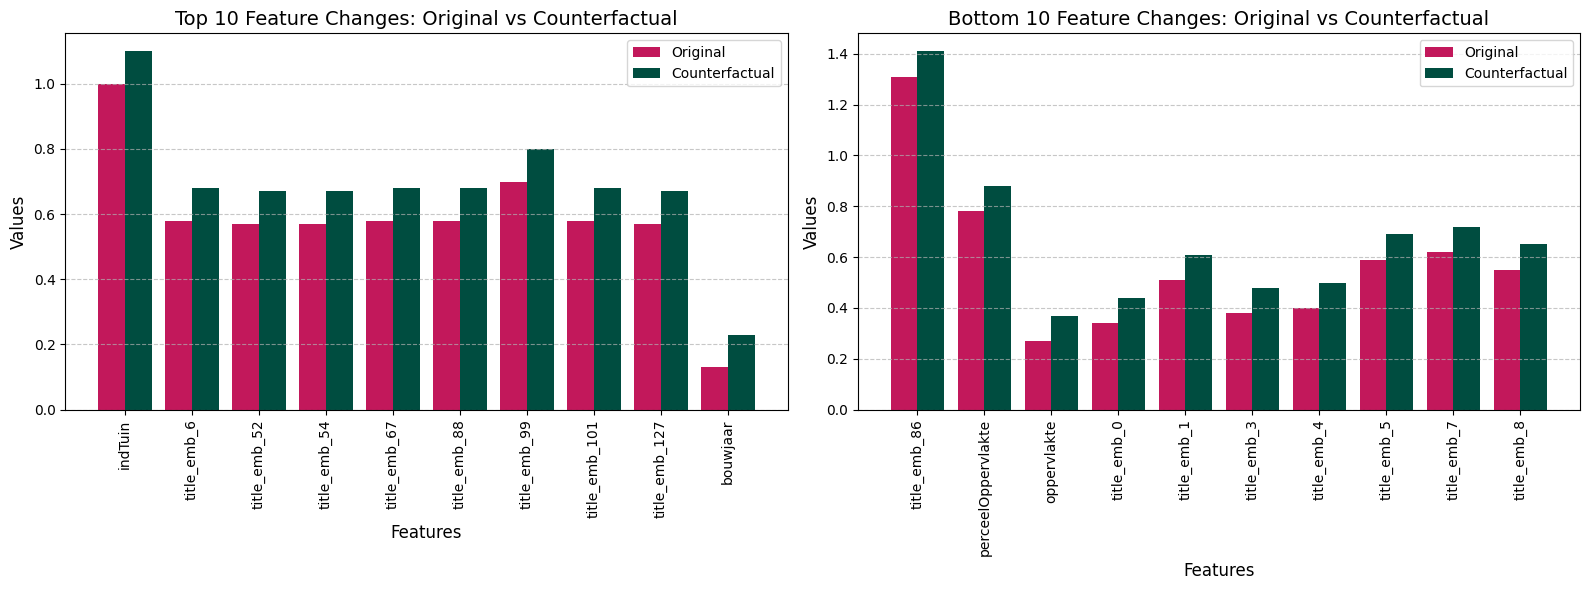

In [120]:
# Ensure 'bouwjaar' (year built) is included in the top and bottom 10 features
changes_df["Difference"] = abs(changes_df["Original Value"] - changes_df["Counterfactual Value"])

# Select top 9 largest changes, then manually add 'bouwjaar' if not already in the top 9
top_features = changes_df.nlargest(9, "Difference")
bottom_features = changes_df.nsmallest(10, "Difference")

# Ensure 'bouwjaar' is included in the top features
if "bouwjaar" not in top_features["Feature"].values and "bouwjaar" in changes_df["Feature"].values:
    bouwjaar_row = changes_df[changes_df["Feature"] == "bouwjaar"]
    top_features = pd.concat([top_features, bouwjaar_row])

# Extract values for plotting
top_features_list = top_features["Feature"].tolist()
top_original_values = top_features["Original Value"].tolist()
top_counterfactual_values = top_features["Counterfactual Value"].tolist()

bottom_features_list = bottom_features["Feature"].tolist()
bottom_original_values = bottom_features["Original Value"].tolist()
bottom_counterfactual_values = bottom_features["Counterfactual Value"].tolist()

# Define color scheme similar to the uploaded image
color_original = "#C2185B"  # Deep red/pink
color_cf = "#004D40"  # Deep teal

# Set figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Feature Changes Plot
x_top = np.arange(len(top_features_list))
axes[0].bar(x_top - 0.2, top_original_values, width=0.4, color=color_original, label="Original")
axes[0].bar(x_top + 0.2, top_counterfactual_values, width=0.4, color=color_cf, label="Counterfactual")

axes[0].set_xlabel("Features", fontsize=12)
axes[0].set_ylabel("Values", fontsize=12)
axes[0].set_title("Top 10 Feature Changes: Original vs Counterfactual", fontsize=14)
axes[0].set_xticks(x_top)
axes[0].set_xticklabels(top_features_list, rotation=90, fontsize=10)
axes[0].legend()
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Bottom 10 Feature Changes Plot
x_bottom = np.arange(len(bottom_features_list))
axes[1].bar(x_bottom - 0.2, bottom_original_values, width=0.4, color=color_original, label="Original")
axes[1].bar(x_bottom + 0.2, bottom_counterfactual_values, width=0.4, color=color_cf, label="Counterfactual")

axes[1].set_xlabel("Features", fontsize=12)
axes[1].set_ylabel("Values", fontsize=12)
axes[1].set_title("Bottom 10 Feature Changes: Original vs Counterfactual", fontsize=14)
axes[1].set_xticks(x_bottom)
axes[1].set_xticklabels(bottom_features_list, rotation=90, fontsize=10)
axes[1].legend()
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Interpretability of the plot:**</span>

This visualization compares the **original vs. counterfactual values** for the **top 10 and bottom 10 most changed features** in the dataset.

The top 10 feature changes, show the features that experienced the **largest** changes when generating the counterfactual. For instance, `indTuin` (presence of a garden) and `bouwjaar` (year built) changed significantly, which suggests that these features are **strongly associated with the prediction outcome**, which can be also confirmed in chapter 9 as Year is one of teh main predictors.However, the bottom 10 feature changes suggest that these features changed **the least** between the original and counterfactual. This means that they have **less influence** in changing the model’s prediction, in other words **they are weaker predictors**.



## <span style="color:rgb(157, 190, 189); font-size: 36px; font-family: 'Times New Roman'; font-weight: bold; background-color: rgba(0, 251, 255, 0.19); padding: 10px; display: block; width: 100%;"> 10.2 Generating Local Counterfactual Explanations for XGBoost Predictions
</span>


100%|██████████| 100/100 [28:26<00:00, 17.07s/it]



Global Feature Importance Summary:
{'oppervlakte': 0.678, 'bouwjaar': 0.244, 'province_Utrecht': 0.198, 'perceelOppervlakte': 0.158, 'title_emb_20': 0.119, 'indTuin': 0.113, 'title_emb_185': 0.11, 'title_emb_162': 0.106, 'title_emb_129': 0.104, 'title_emb_87': 0.102, 'title_emb_310': 0.102, 'province_Groningen': 0.101, 'title_emb_4': 0.099, 'title_emb_229': 0.099, 'title_emb_126': 0.096, 'title_emb_7': 0.092, 'title_emb_295': 0.092, 'title_emb_371': 0.092, 'title_emb_376': 0.091, 'title_emb_3': 0.088, 'title_emb_203': 0.088, 'title_emb_82': 0.087, 'title_emb_9': 0.086, 'title_emb_19': 0.086, 'title_emb_61': 0.086, 'title_emb_251': 0.086, 'province_Overijssel': 0.085, 'title_emb_263': 0.084, 'title_emb_130': 0.081, 'title_emb_351': 0.081, 'title_emb_271': 0.08, 'province_Friesland': 0.08, 'title_emb_291': 0.079, 'title_emb_201': 0.078, 'title_emb_223': 0.078, 'title_emb_23': 0.077, 'title_emb_168': 0.077, 'title_emb_367': 0.077, 'province_Zuid-Holland': 0.077, 'title_emb_50': 0.076, 't

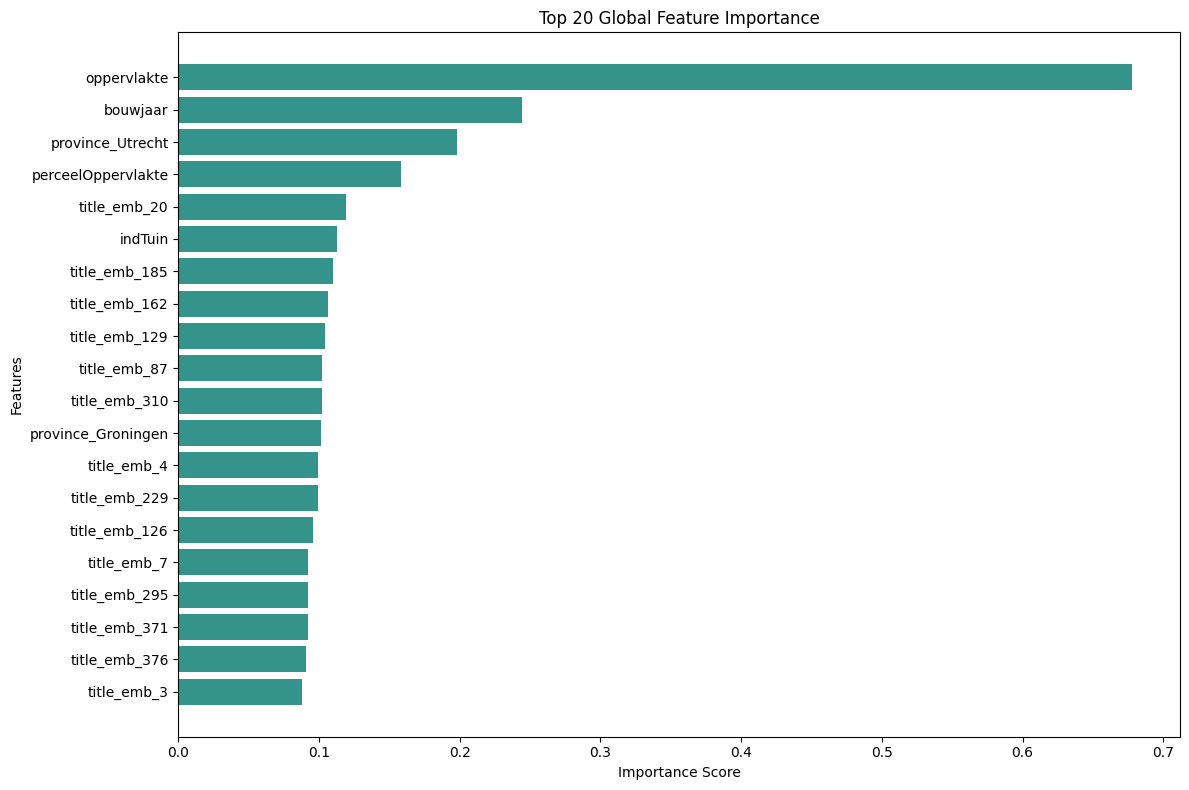

In [ ]:
import dice_ml
from dice_ml.utils import helpers
import warnings
import pandas as pd
import matplotlib.pyplot as plt

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Ensure data types are consistent
X_test = X_test.astype("float64")
y_test = y_test.astype("float64")

# Dynamically identify continuous (numerical) features
continuous_features = X_test.select_dtypes(include=["float64", "int64"]).columns.tolist()

# Step 1: Prepare the dataset and model
data = X_test.assign(worldwide_box_office=y_test)  # Combine features and target
dice_data = dice_ml.Data(dataframe=data, continuous_features=continuous_features, outcome_name="worldwide_box_office")
dice_model = dice_ml.Model(model=merged_data_xgb, backend="sklearn", model_type="regressor")

# Step 2: Initialize the DiCE explainer
dice_explainer = dice_ml.Dice(dice_data, dice_model, method="random")

# Step 3: Generate global feature importance over multiple instances
query_instances = X_test.iloc[:100]  # Select the first 100 rows for analysis
global_importance = dice_explainer.global_feature_importance(
    query_instances=query_instances,
    desired_range=(1.0, 2.0),  # Specify the target range for regression outcomes
    total_CFs=10               # Number of counterfactuals per instance
)

# Step 4: Display global feature importance summary
print("\nGlobal Feature Importance Summary:")




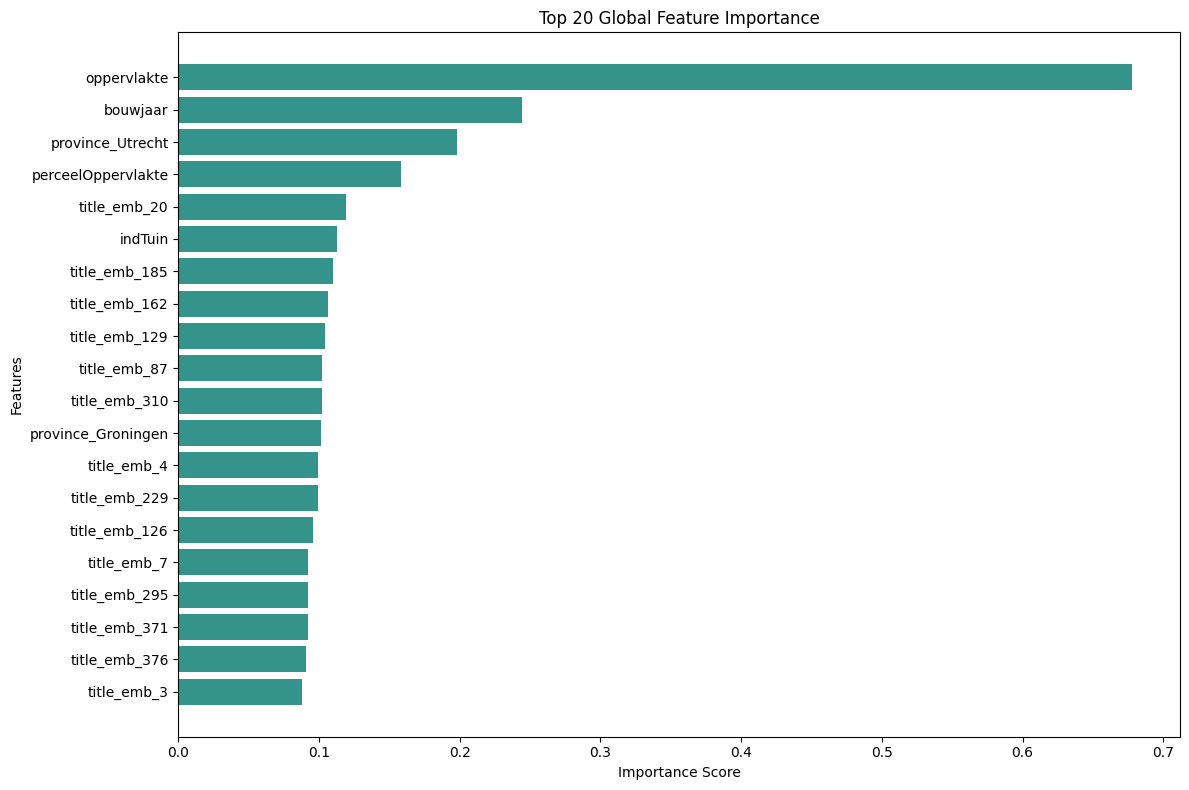

In [127]:
# Extract feature names and importance values
features = list(global_importance.summary_importance.keys())
importance_values = list(global_importance.summary_importance.values())

# Sort features by importance
sorted_indices = sorted(range(len(importance_values)), key=lambda x: -importance_values[x])
top_features = [features[i] for i in sorted_indices[:20]]
top_importance_values = [importance_values[i] for i in sorted_indices[:20]]

# Step 5: Visualize top 20 global feature importance
plt.figure(figsize=(12, 8))
plt.barh(top_features, top_importance_values, color='#01796F', alpha=0.8)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Top 20 Global Feature Importance")
plt.gca().invert_yaxis()  # Reverse the order for better readability
plt.tight_layout()
plt.show()


<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Interpretability of the plot:**</span>



The above graph shows the **top 20 most influential features** which drives real estate price predictions. It plots the importance score of each feature on how much each contributes to the model’s predictions. 
→ So high importance score = stronger price predictor.



---

<span style="color:#7AD6C7; font-family:'Times New Roman'; font-size:32px;">**Key Insights on top 5 features:**</span>

1. **"Oppervlakte" (Surface Area) is the dominant factor**  
   - It has the highest importance score, which suggest it is the highest predictor of property prices, meaning that the size of a property is a strong determinant of the price or has mayor influence on the price. 

2. **"Bouwjaar" (Year of Construction) is the second most important factor**  
   - The contruction year is the second highest predictor, in other words the year has a strong effect on the final price of a property. 

3. **"Province_Utrecht" and "Province_Groningen" show location relevance**  
   - Same for location, it seems like Utrecht is a high demanded locations for properties. Therefore, this has a stronger influence on the price, unlike  Groningen it has lower demand for properties in comparison to Utrecht. 

4. **Parcel-related factors like "perceelOppervlakte" (Parcel Size) also play a role**  
   - Moreover parcel size also influences property valuation.

5. **Title Embeddings as Predictive Features**  
   - The presence of multiple `title_emb_20*` features suggests that textual or categorical property descriptions (e.g., listing titles) contain valuable signals for price estimation. As from the table below, by looking at the embeddings with the highest value in that column teh description of one of the highest is as follow:

   'Een prachtige ruime verdieping van 84 m op de tweede verdieping van een Rijksmonument op een waanzinnige plek van het Singel.' this is an example of title that influences or can attract teh audience.  
---

In [ ]:
import pandas as pd

# Define file paths
file1 = r"C:\Users\josel\OneDrive\Documents\GitHub\funda_title_embeddings.csv"

# Read CSV files into DataFrames
df_embeddings = pd.read_csv(file1)




In [8]:
df_embeddings

,globalId,publicatieDatum,volledigeOmschrijving,datum_ondertekening,is_not_dutch,title_emb_0,title_emb_1,title_emb_2,title_emb_3,title_emb_4,...,title_emb_374,title_emb_375,title_emb_376,title_emb_377,title_emb_378,title_emb_379,title_emb_380,title_emb_381,title_emb_382,title_emb_383
0,4388064,2018-07-31,"Ruimte, vrijheid, en altijd het water en de we...",2018-11-12,True,0.115554,0.169219,-0.079049,0.216654,0.297888,...,0.213413,0.090659,-0.199005,0.189424,-0.489169,-0.059517,0.010558,0.058313,0.187937,0.087649
1,4388200,2018-09-24,Verrassend ruime tussenwoning nabij het centru...,2018-08-30,True,0.810335,-0.211732,0.003049,0.157086,0.247893,...,-0.068587,-0.325460,-0.046606,-0.110433,-0.008430,-0.068573,0.039107,0.260568,-0.379171,0.236237
2,4399344,2018-08-02,ENGLISH TRANSLATION On the 21st of September ...,2018-11-23,True,-0.179539,0.090731,-0.133890,-0.306337,-0.319587,...,0.244091,-0.000970,0.016918,-0.152569,0.114356,0.578687,0.426044,-0.332518,-0.659340,0.228137
3,4400638,2018-08-04,Wonen in een zeer royaal bemeten geschakelde 2...,2018-12-14,True,0.465946,0.150206,0.008705,0.203124,0.126866,...,-0.177962,0.024995,-0.008957,-0.010271,-0.012119,-0.073416,0.129373,0.178103,-0.222430,0.007829
4,4401765,2018-08-05,Landgoed Junne is een eeuwenoud landgoed en li...,2018-12-06,True,0.297377,0.208478,0.134007,0.084474,-0.123818,...,0.047577,0.154439,-0.213650,-0.134924,-0.116619,0.112062,0.215082,-0.122840,-0.183596,0.088222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211612,4613507,2018-12-31,Ruime eengezinswoning aangeboden aan de rand v...,2019-03-07,True,0.171318,0.169386,-0.028450,0.181420,0.039156,...,-0.095723,-0.028805,0.051141,-0.194172,-0.006468,-0.008758,0.160832,-0.029587,-0.357081,0.128106
211613,4613532,2018-12-31,Nabij centrum van Hoensbroek met al haar voorz...,2019-01-17,True,0.375643,0.078695,-0.142099,0.186576,0.091716,...,-0.178864,-0.050138,-0.114316,-0.184405,-0.099114,-0.037243,-0.050741,0.127512,-0.198170,0.134619
211614,4613537,2018-12-31,Ook de kans aangrijpen om te mogen wonen in de...,2019-08-03,True,0.105809,0.135195,-0.072987,-0.026432,-0.078931,...,-0.075479,-0.087180,-0.020431,0.016453,-0.014206,-0.036831,-0.104213,0.011631,-0.065878,0.194130
211615,4613566,2018-12-31,"BIEDEN VANAF € 375.000, kosten koper Het uitzi...",2019-04-08,True,0.125949,0.228461,-0.279088,0.087346,-0.153960,...,-0.228800,-0.096198,-0.068796,-0.003694,-0.310105,0.187887,0.259322,-0.390282,-0.056110,-0.122970


# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">11. Conclusion</span>

### Stakeholder Conclusion:
The feature importance graph highlights that **oppervlakte** (area), **bouwjaar** (year of construction), and **province_Utrecht** are the most influential variables in predicting property prices. Larger properties, newer constructions, and those in Utrecht tend to have higher prices. Other important factors include **perceelOppervlakte** (lot size) and **title_emb_20** features, likely representing key descriptive attributes.

### Sub-question 3:
The most influential housing attributes are **area**, **year of construction**, and **location (Utrecht)**, with **lot size** also playing a significant role.

# <span style="color:rgb(185, 241, 238); font-size: 48px; font-family: 'Times New Roman'; font-weight: bold; text-decoration: underline;">Reference List </span>

Shafi, A. (2024, October 1). Random Forest Classification with Scikit-Learn. Retrieved February 21, 2025, from https://www.datacamp.com/tutorial/random-forests-classifier-python